In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', -1)

## read, head, info

In [3]:
movie_df = pd.read_csv('./data/clean_movie_plus_credit.csv', encoding='raw_unicode_escape')

This dataset was got from TMDB, where all of it's data were got from the user's input, so there might be an error due to human's error while the user was inputing the data or the user's lack of knowledge about the movies. I have do some cleaning and merged the data into one csv so it's easier to work with.

In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 26 columns):
budget                      4803 non-null int64
genres                      4775 non-null object
id                          4803 non-null int64
keywords                    4390 non-null object
original_language           4803 non-null object
original_title              4803 non-null object
overview                    4803 non-null object
popularity                  4803 non-null float64
production_companies        4451 non-null object
production_countries        4629 non-null object
release_date                4803 non-null object
revenue                     4803 non-null int64
runtime                     4803 non-null float64
spoken_languages            4715 non-null object
status                      4803 non-null object
tagline                     3959 non-null object
title                       4803 non-null object
vote_average                4803 non-null float64
vote_count 

Columns:
    - budget                   : budget of the movies
    - genres                   : movie's genre
    - id                       : the movie's id in TMDB's database
    - keywords                 : keywords about the movie
    - original_language        : original language of the movie
    - original_title           : original title of the movie
    - overview                 : overview about the movie
    - popularity               : popularity score
    - production_companies     : production house of the movie
    - production_countries     : country where it was produced
    - release_date             : released date of the movie
    - revenue                  : worldwide revenue generated by the movie
    - runtime                  : runtime of the movie in minutes
    - spoken_languages         : languages that spoken in th movie
    - status                   : "Released" or "Rumored"
    - tagline                  : tagline of the movie
    - title                    : title of the movie
    - vote_average             : average rating the movie recieved
    - vote_count               : total vote the movie recieved
    - production_countries_iso : production country in iso format
    - spoken_languages_iso     : spoken language in iso format
    - release_year             : year the movie was released
    - release_month            : month the movie was released
    - cast_name                : name of the actors in the movie
    - producer                 : producer of the movie
    - director                 : director of the movie

## describe 

In [5]:
movie_df.describe()

budget             id   popularity       revenue      runtime  vote_average    vote_count  release_year  release_month
count  4.803000e+03  4803.000000    4803.000000  4.803000e+03  4803.000000  4803.000000   4803.000000   4803.000000   4803.000000  
mean   2.904504e+07  57165.484281   21.492301    8.226064e+07  106.868624   6.092172      690.217989    2002.471372   6.795128     
std    4.072239e+07  88694.614033   31.816650    1.628571e+08  22.610670    1.194612      1234.585891   12.414378     3.424269     
min    0.000000e+00  5.000000       0.000000     0.000000e+00  0.000000     0.000000      0.000000      1916.000000   1.000000     
25%    7.900000e+05  9014.500000    4.668070     0.000000e+00  94.000000    5.600000      54.000000     1999.000000   4.000000     
50%    1.500000e+07  14629.000000   12.921594    1.917000e+07  103.000000   6.200000      235.000000    2005.000000   7.000000     
75%    4.000000e+07  58610.500000   28.313505    9.291719e+07  117.500000   6.800000      737.000000    2011.000000   10.000000    
max    3.800000e+08  459488.000000  875.581305   2.787965e+09  338.000000   10.000000     13752.000000  2017.000000   12.000000

From description above we can see that there are movie's that have 0 USD budget, 0 revenue, 0 runtime, that seems weird, but I assume it was due to human's error when the users were inputing the data. We will check about it later.<br>
While popularity, vote_average, and vote_count also have 0 value, I don't think it's weird, that might because that movie was really not popular. Also, from that table we know that 75% of the movie are not really popular, only 25% of it get popularity's score more that 28.3 points.<br>
Movie's that get perfect score vote_average also quite interesting to be checked.

In [6]:
movie_df.describe(exclude='number')

genres          keywords original_language   original_title                                                                                                                                                                                                                                                                                                                                                                 overview production_companies      production_countries release_date  \
count   4775   4390              4803              4803             4803                                                                                                                                                                                                                                                                                                                                                                     4451                 4629                      4803          
unique  1174   4220              37                4801             4803                                                                                                                                                                                                                                                                                                                                                                     3692                 468                       3281          
top     Drama  independent film  en                Out of the Blue  The last movie from the team of Ismail Merchant, James Ivory, and Kazuo Ishiguro. Set in 1930s Shanghai, "The White Countess" is both Sofia (Natasha Richardson), a fallen member of the Russian aristocracy, and a nightclub created by a blind American diplomat named Jackson (Ralph Fiennes), who asks Sofia to be the centerpiece of the world he wants to create.  Paramount Pictures   United States of America  2006-01-01    
freq    370    55                4505              2                1                                                                                                                                                                                                                                                                                                                                                                        60                   2977                      10            

       spoken_languages    status                 tagline     title production_countries_iso spoken_languages_iso  \
count   4715             4803      3959                    4803      4629                     4717                  
unique  486              3         3944                    4800      468                      543                   
top     English          Released  Based on a true story.  The Host  US                       en                    
freq    3200             4795      3                       2         2977                     3171                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    cast_name  \
count   4757                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

From descriptions above we know that drama is the most produced genre, Paramount Pictures produced more movie that others company, most movie were produce in USA and in English, Steven Spielberg and Neal H. Moritz were director and producer that produce most movie in this dataset.<br><br>

There are two movie that seem share a same name, I'll check about it too.<br><br>

Status column seem's not very important because it has 4795 row that have 'Released' value. Only 8 columns have different value, so I'll just drop this column.<br>

## drop original_title

In [7]:
movie_df[['title','original_title']].apply(lambda x: False if x[0]==x[1] else print(x), axis=1)

title             Shin Godzilla                                                           
original_title    ÃÂ£ÃÂÃÂ·ÃÂ£ÃÂÃÂ³ÃÂ£ÃÂÃÂ»ÃÂ£ÃÂÃÂ´ÃÂ£ÃÂÃÂ¸ÃÂ£ÃÂÃÂ©
Name: 97, dtype: object
title             Fantastic 4: Rise of the Silver Surfer
original_title    4: Rise of the Silver Surfer          
Name: 215, dtype: object
title             Asterix at the Olympic Games      
original_title    AstÃÂÃÂ©rix aux Jeux Olympiques
Name: 235, dtype: object
title             The Flowers of War                                          
original_title    ÃÂ©ÃÂÃÂÃÂ©ÃÂÃÂµÃÂ¥ÃÂÃÂÃÂ¤ÃÂ¸ÃÂÃÂ©ÃÂÃÂµ
Name: 317, dtype: object
title             Evolution       
original_title    ÃÂÃÂvolution
Name: 474, dtype: object
title             Arthur and the Invisibles
original_title    Arthur et les Minimoys   
Name: 488, dtype: object
title             Top Cat Begins                    
original_title    Don Gato: El inicio de la pandilla
Name: 492, dtype: object
ti

Name: 4206, dtype: object
title             The Bubble
original_title    Ha-Buah   
Name: 4208, dtype: object
title             Dil Jo Bhi Kahey...                                                                                                        
original_title    ÃÂ ÃÂ¤ÃÂ¦ÃÂ ÃÂ¤ÃÂ¿ÃÂ ÃÂ¤ÃÂ² ÃÂ ÃÂ¤ÃÂÃÂ ÃÂ¥ÃÂ ÃÂ ÃÂ¤ÃÂ­ÃÂ ÃÂ¥ÃÂ ÃÂ ÃÂ¤ÃÂÃÂ ÃÂ¤ÃÂ¹ÃÂ ÃÂ¥ÃÂ
Name: 4210, dtype: object
title             Mississippi Mermaid           
original_title    La sirÃÂÃÂ¨ne du Mississipi
Name: 4211, dtype: object
title             Nine Queens 
original_title    Nueve Reinas
Name: 4226, dtype: object
title             The Holy Girl       
original_title    La niÃÂÃÂ±a santa
Name: 4260, dtype: object
title             The Blue Room   
original_title    La chambre bleue
Name: 4265, dtype: object
title             The Celebration
original_title    Festen         
Name: 4270, dtype: object
title             Journey from the Fall             
original_title    VÃ

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

Original title seems writen in difference language so I'll just drop them.

In [8]:
movie_df.drop('original_title',axis=1,inplace=True)

## drop status

In [9]:
movie_df.drop('status',axis=1,inplace=True)

## Check Movies which title is 'Out of Blue'

In [10]:
movie_df[movie_df['title'] == 'Out of the Blue']

budget genres     id                                                                      keywords original_language  \
3647  0       Drama  39269  punk,independent film,coming of age,teenage girl,alcoholic father             en                 
3693  0       Drama  10844  new zealand,gun rampage,police,independent film,neighbor,person running amok  en                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 overview  \
3647  Dennis Hopper is a hard-drinking truck driver who loses control of his truck under the influence and slams it into a busload of screaming children. After serving his five year jail sentence, Hopper finds his daughter, Cebe (Linda Manz), the love of his live, grown into a rebellious punk in a backwater town, having barely been looked after by her junkie mon (Sharron Farrell). Cebe's hopes of once again becoming a "normal" family painfully proves to be doomed, as she desperately tries to hold everyone together. Hopper's loose, naturalistic style and sympathetic, yet critical attitude infuses the drama with a painful power that finally erupts in a devastating and thrillling conclusion.   
3693  Ordinary people find extraordinary courage in the face of madness. On 13ÃÂ¢ÃÂÃÂ14 November 1990 that madness came to Aramoana, a small New Zealand seaside town, in the form of a lone gunman with a high-powered semi-automatic rifle. As he stalked his victims the terrified and confused residents were trapped for 24 hours while a handful of under-resourced and under-armed local policemen risked their lives trying to find him and save the survivors. Based on true events.                                                                                                                                                                                                                          

      popularity production_companies production_countries release_date  revenue  runtime spoken_languages                                            tagline            title  vote_average  vote_count production_countries_iso spoken_languages_iso  release_year  release_month  \
3647  0.679351    Robson Street        Canada               1980-05-01   0        94.0     English          A harrowing drama from the director of Easy Rider  Out of the Blue  6.5           17          CA                       en                   1980          5               
3693  0.706355    NaN                  New Zealand          2006-10-12   0        103.0    English          The true story of a small town massacre            Out of the Blue  5.9           18          NZ                       en                   2006          10              

                                                                                                                                                                                                                                                                                         cast_name                                        producer        director  
3647  Dennis Hopper,Raymond Burr,Sharon Farrell,Linda Manz,Don Gordon                                                                                                                                                                                                                               Jean Gontier,Leonard Yakir,Gary Jule

It seems both of them are a completely different movie that only share the same name.

## 0 budget 0 revenue 0 runtime movies 

In [11]:
movie_df[movie_df['budget']==0].describe()

budget             id   popularity       revenue      runtime  vote_average   vote_count  release_year  release_month
count  1037.0  1037.000000    1037.000000  1.037000e+03  1037.000000  1037.000000   1037.000000  1037.000000   1037.000000  
mean   0.0     82251.553520   5.177785     3.475736e+06  97.988428    5.604436      86.354870    2003.853423   6.284474     
std    0.0     105552.659217  6.500848     1.820913e+07  26.527174    1.708292      164.818853   10.456922     3.489239     
min    0.0     20.000000      0.000000     0.000000e+00  0.000000     0.000000      0.000000     1929.000000   1.000000     
25%    0.0     13768.000000   0.772668     0.000000e+00  89.000000    5.100000      8.000000     2000.000000   3.000000     
50%    0.0     31064.000000   2.948576     0.000000e+00  97.000000    6.000000      28.000000    2006.000000   6.000000     
75%    0.0     94352.000000   7.314796     0.000000e+00  108.000000   6.600000      95.000000    2011.000000   9.000000     
max    0.0     447027.000000  74.817641    2.536254e+08  276.000000   10.000000     2067.000000  2017.000000   12.000000

It seems most of the movies that have 0 budget really not a popular one, since 75% of the movies get only 95 vote_count and have 0 revenue, this might due to the lack of information about the movie's budget and revenue. Although, there are movies that get 2067 vote_count and get 253 millions dollars revenue.

In [12]:
movie_df[movie_df['budget']==0].describe(exclude='number')

genres          keywords original_language                                                                                                                                                                                                                                                                                                                                       overview production_companies      production_countries release_date spoken_languages  \
count   1013   798               1037              1037                                                                                                                                                                                                                                                                                                                                           776                  904                       1037         972               
unique  355    707               26                1037                                                                                                                                                                                                                                                                                                                                           710                  154                       895          111               
top     Drama  independent film  en                Years after their teenage daughterÃÂ¢ÃÂÃÂs death, Lois and Doug Riley, an upstanding Indiana couple, are frozen by estranging grief. Doug escapes to New Orleans on a business trip. Compelled by urgencies he doesnÃÂ¢ÃÂÃÂt understand, he insinuates himself into the life of an underage hooker, becoming her platonic guardian.  New Line Cinema      United States of America  2006-01-01   English           
freq    121    32                921               1                                                                                                                                                                                                                                                                                                                                              8                    536                       8            691               

                                                              tagline            title production_countries_iso spoken_languages_iso                                                                                                                                                                     cast_name         producer   director  
count   591                                                            1037             904                      974                  1002                                                                                                                                                                          543              961        
unique  591                                                            1036             154                      120                  1002                                                                                                                                                                          521              861        
top     Your eyes... Your ears... Your senses... will be overwhelmed.  Out of the Blue  US                       en                   Vladimir Garin,Konstantin Lavronenko,Nataliya Vdovina,Vanya Dobronravov,Yelizaveta Aleksandrova,Lazar Dubovik,Lyubov Kazakova,Galina Petrova,Aleksei Suknovalov,Andrey Sumin  Ismail Merchant  Spike Lee  
freq    1                                                              2                536                      687                  1                                                                                                                                                                             3                7

The descriptions about non-numerical columns doesn't seems so different, the top genre is still drama, top keywords still independent film, most of the movies still produced in USA and in English. The only differences were the production company, producers and directors.

In [13]:
movie_df[movie_df['budget']==0][['title','popularity','vote_average','vote_count','revenue','production_companies','director']]

title  popularity  vote_average  vote_count    revenue  \
265   The Cat in the Hat                                     18.251129   4.9           366         0           
321   The Campaign                                           16.460356   5.6           578         104907746   
359   Alvin and the Chipmunks: The Road Chip                 27.867368   5.8           428         233755553   
406   Arthur Christmas                                       19.836830   6.7           333         0           
409   All That Jazz                                          5.159407    7.3           85          37823676    
453   The Pink Panther                                       25.450534   5.6           550         0           
463   DÃÂÃÂ©jÃÂÃÂ  Vu                                  0.605645    8.0           1           0           
474   Evolution                                              3.300061    6.4           47          0           
475   The Edge                                               20.632673   6.7           349         43312294    
489   Oceans                                                 10.706613   7.3           111         19406406    
542   Carriers                                               12.708963   5.8           282         5802422     
584   Wolf                                                   13.758526   6.0           216         0           
601   Rollerball                                             9.306253    3.4           106         0           
691   Wild Hogs                                              31.719463   5.6           648         253625427   
721   Kangaroo Jack                                          10.292864   4.3           203         0           
735   The Tuxedo                                             21.549232   5.3           483         0           
745   Miss Congeniality 2: Armed and Fabulous                19.998581   5.3           425         0           
757   Trouble with the Curve                                 18.587114   6.6           366         0           
766   Garfield: A Tail of Two Kitties                        16.930969   5.1           464         141702264   
847   Semi-Pro                                               10.449975   5.4           251         33472850    
881   Beloved                                                1.453765    5.9           26          0           
882   Lucky You                                              6.162872    5.4           81          5761917     
897   Deck the Halls                                         5.952527    5.1           109         47231070    
915   Stepmom                                                16.368283   6.9           277         0           
948   The Replacements                                       14.837288   6.1           203         0           
1007  Anna Karenina                                          26.387040   6.5           639         68929150    
1011  The Tooth Fairy                                        0.716764    4.3           13          0           
1016  Kate & Leopold                                         11.940711   6.0           418         0           
1023  Earth                                                  1.246883    6.6           9           528972      
1028  Solaris                                                24.132271   7.7           357         0           
1032  America's Sweethearts                                  10.698929   5.5           252         0           
1066  Yours, Mine and Ours                                   2.094151    6.2           26          0           
1069  Fat Albert                                             7.157635    4.3           69          0           
1080  Across the Universe                                    11.872841   7.1           410         0           
1126  Here Comes the Boom                                    26.799913   6.0           593         73100172    
1142  Why I Did (Not) 

After look at the dataframe, I think the reason why the budget 0 beside the lack of data was due to an error while inputing the data or the user's lack of knowledge about the movie's budget because I can recognized a couple movie that are quite well know and when I googled some of the movies, I can easily get the rough number of the movie's budget. Since, budget not really an important features in recommendation's model, I won't do anything about it and will drop it later after some ploting to get a little insight about it.

In [14]:
movie_df[movie_df['runtime']==0].describe()

budget             id  popularity       revenue  runtime  vote_average  vote_count  release_year  release_month
count  3.500000e+01  35.000000      35.000000   3.500000e+01  35.0     35.000000     35.000000   35.000000     35.000000    
mean   1.571429e+05  215432.257143  0.362839    7.408023e+04  0.0      3.345714      3.114286    2010.000000   5.285714     
std    7.150836e+05  114531.689289  0.510986    4.382645e+05  0.0      3.029885      4.873526    5.835994      3.468950     
min    0.000000e+00  40963.000000   0.000000    0.000000e+00  0.0      0.000000      0.000000    1991.000000   1.000000     
25%    0.000000e+00  105077.500000  0.039656    0.000000e+00  0.0      0.000000      0.000000    2006.000000   2.000000     
50%    0.000000e+00  263503.000000  0.136721    0.000000e+00  0.0      4.200000      1.000000    2012.000000   5.000000     
75%    0.000000e+00  321852.500000  0.402185    0.000000e+00  0.0      5.100000      4.000000    2014.000000   7.500000     
max    4.000000e+06  380097.000000  2.028170    2.592808e+06  0.0      10.000000     20.000000   2016.000000   12.000000

In [15]:
movie_df[movie_df['runtime']==0][['title','popularity','vote_average','vote_count','budget','revenue','production_companies','director']]

title  popularity  vote_average  vote_count   budget  revenue                                               production_companies                                 director
1011  The Tooth Fairy                                        0.716764    4.3           13          0        0        NaN                                                                Chuck Bowman                           
3112  Blood Done Sign My Name                                0.397341    6.0           5           0        0        NaN                                                                Jeb Stuart                             
3669  Should've Been Romeo                                   0.407030    0.0           0           0        0        Phillybrook Films                                                  Marcia Bennett                         
3809  How to Fall in Love                                    1.923514    5.2           20          4000000  0        Annuit Coeptis Entertainment Inc.,Annuit Coeptis Entertainment II  Mark Griffiths                         
3953  Fort McCoy                                             0.384496    6.3           2           0        0        NaN                                                                Michael Worth,Kate Connor              
3992  Sardaarji                                              0.296981    9.5           2           0        0        NaN                                                                Rohit Jugraj                           
4068  Sharkskin                                              0.027801    0.0           0           0        0        NaN                                                                NaN                                    
4118  Hum To Mohabbat Karega                                 0.001186    0.0           0           0        0        NaN                                                                NaN                                    
4205  N-Secure                                               0.134560    4.3           4           0        2592808  NaN                                                                David M. Matthews                      
4210  Dil Jo Bhi Kahey...                                    0.122704    0.0           0           0        0        Entertainment One Pvt. Ltd.                                        Romesh Sharma                          
4241  The Salon                                              2.028170    3.5           1           1500000  0        NaN                                                                Mark Brown                             
4313  Below Zero                                             1.365140    4.4           12          0        0        NaN                                                                Justin Thomas Ostensen                 
4318  Bleeding Hearts                                        0.100533    2.0           1           0        0        NaN                                                                Dylan Bank                             
4322  Sex With Strangers                                     0.014406    5.0           1           0        0        NaN                                                                NaN                                    
4328  The Vatican Exorcisms                                  0.447166    4.4           11          0        0        NaN                                                                Joe Marino                             
4405  Karachi se Lahore                                      0.060003    8.0           1           0        0        NaN                                                                NaN                                    
4435  The Horror Network Vol. 1                              0.392658    5.0           2           0        0        NaN                                                                Joseph Graham,Brian Dorton,Lee Matthews
4458  Harrison Montgom

There are 35 movies that have 0 minute runtime and judging from the popularity, all of those movies are not a very popular movie and that's probably the reason why it is zero.

In [16]:
movie_df[movie_df['revenue']==0].describe()

budget             id   popularity  revenue      runtime  vote_average   vote_count  release_year  release_month
count  1.427000e+03  1427.000000    1427.000000  1427.0   1427.000000  1427.000000   1427.000000  1427.000000   1427.000000  
mean   5.767431e+06  84719.239664   5.480097     0.0      98.556412    5.579818      88.819902    2003.933427   6.354590     
std    1.371360e+07  110427.934012  6.368024     0.0      23.830870    1.609238      161.892058   10.421101     3.540051     
min    0.000000e+00  68.000000      0.000000     0.0      0.000000     0.000000      0.000000     1929.000000   1.000000     
25%    0.000000e+00  12599.000000   1.066217     0.0      90.000000    5.100000      10.000000    2000.000000   3.000000     
50%    0.000000e+00  28665.000000   3.433625     0.0      97.000000    5.900000      34.000000    2006.000000   7.000000     
75%    4.000000e+06  103636.500000  7.775556     0.0      108.000000   6.500000      100.000000   2011.000000   9.000000     
max    1.500000e+08  459488.000000  49.808505    0.0      276.000000   10.000000     1671.000000  2017.000000   12.000000

In [17]:
movie_df[movie_df['revenue']==0].describe(exclude='number')

genres          keywords original_language                                                                                                                                                   overview production_companies      production_countries release_date spoken_languages                                                                            tagline            title production_countries_iso spoken_languages_iso  \
count   1400   1119              1427              1427                                                                                                                                                       1127                 1275                      1427         1349             865                                                                                1427             1275                     1351                  
unique  465    1014              27                1427                                                                                                                                                       1018                 213                       1203         149              865                                                                                1426             213                      168                   
top     Drama  independent film  en                A young man (Lerman) moves from Montana to Florida with his family, where he's compelled to engage in a fight to protect a population of endangered owls.  Touchstone Pictures  United States of America  2006-01-01   English          Do you hate spiders? Do you really hate spiders? Well they don't like you either.  Out of the Blue  US                       en                    
freq    146    42                1272              1                                                                                                                                                          10                   740                       10           942              1                                                                                  2                740                      934                   

                                                                                                     cast_name                    producer     director  
count   1385                                                                                                    793                         1319         
unique  1385                                                                                                    762                         1136         
top     David Hewlett,Kate Hewlett,Paul McGillion,Christopher Judge,Rachel Luttrell,Amanda Byram,Michael Lenic  Menahem Golan,Yoram Globus  Woody Allen  
freq    1                                                                                                       4                           9

Looking at the descriptions above, I think the reason why there were some 0 revenue, are the same as the budget's reason.

## vote average 0 and 10 

In [18]:
movie_df[movie_df['vote_average']==0].describe()

budget             id  popularity       revenue     runtime  vote_average  vote_count  release_year  release_month
count  6.300000e+01  63.000000      63.000000   63.000000     63.000000   63.0          63.000000   63.000000     63.000000    
mean   1.294683e+05  264090.603175  0.144018    219.650794    76.031746   0.0           0.015873    2009.904762   6.063492     
std    5.345653e+05  117793.943576  0.258817    1382.304273   41.215393   0.0           0.125988    6.779272      3.392939     
min    0.000000e+00  38786.000000   0.000000    0.000000      0.000000    0.0           0.000000    1983.000000   1.000000     
25%    0.000000e+00  176210.000000  0.007759    0.000000      74.500000   0.0           0.000000    2007.000000   3.000000     
50%    0.000000e+00  288927.000000  0.036532    0.000000      89.000000   0.0           0.000000    2013.000000   6.000000     
75%    0.000000e+00  359616.000000  0.151617    0.000000      98.000000   0.0           0.000000    2014.000000   9.000000     
max    3.500000e+06  459488.000000  1.618138    10508.000000  200.000000  0.0           1.000000    2016.000000   12.000000

In [19]:
movie_df[movie_df['vote_average']==0][['title','popularity','vote_average','vote_count','revenue','production_companies','director']]

title  popularity  vote_average  vote_count  revenue                                       production_companies                            director
1464  Black Water Transit                                0.126738    0.0           0           0        Capitol Films                                              Tony Kaye                         
3669  Should've Been Romeo                               0.407030    0.0           0           0        Phillybrook Films                                          Marcia Bennett                    
3670  Running Forever                                    0.028756    0.0           0           0        New Kingdom Pictures                                       NaN                               
3852  The Secret                                         0.042346    0.0           0           0        NaN                                                        Nick Murphy                       
3855  Time to Choose                                     1.618138    0.0           0           0        Representational Pictures                                  Charles Ferguson                  
3960  The Deported                                       0.194848    0.0           0           0        NaN                                                        Lance Kawas                       
3967  Four Single Fathers                                0.008263    0.0           0           0        Indiana Production Company                                 Paolo Monico                      
4051  8 Days                                             0.015295    0.0           0           0        After Eden Pictures                                        Jaco Booyens                      
4065  Mi America                                         0.039007    0.0           0           3330     Industrial House Films                                     Robert Fontaine                   
4068  Sharkskin                                          0.027801    0.0           0           0        NaN                                                        NaN                               
4118  Hum To Mohabbat Karega                             0.001186    0.0           0           0        NaN                                                        NaN                               
4140  To Be Frank, Sinatra at 100                        0.050625    0.0           0           0        Eyeline Entertainment                                      NaN                               
4186  A Beginner's Guide to Snuff                        0.060127    0.0           0           0        NaN                                                        Mitchell Altieri                  
4210  Dil Jo Bhi Kahey...                                0.122704    0.0           0           0        Entertainment One Pvt. Ltd.                                Romesh Sharma                     
4266  House at the End of the Drive                      0.430490    0.0           0           0        Allure Entertainment                                       David Worth                       
4269  The Ballad of Gregorio Cortez                      0.592821    0.0           0           0        Moctesuma Esparza Productions                              Robert M. Young                   
4275  Queen of the Mountains                             0.077873    0.0           0           0        Kirghizfilm,Aitysh Film                                    NaN                               
4293  The Algerian                                       0.025364    0.0           0           0        Zelko Films                                                Giovanni Zelko                    
4305  Down & Out With The Dolls                          0.002386    0.0           0           0        NaN                                                        NaN                               
4307  Certifiably Jonathan                               0.047781    0.0           0      

In [20]:
movie_df[movie_df['vote_average']==10].describe()

budget             id  popularity   revenue    runtime  vote_average  vote_count  release_year  release_month
count  4.00    4.000000       4.000000    4.0       4.000000   4.0           4.00        4.000000      4.000000     
mean   0.25    142675.500000  0.229841    141398.0  71.500000  10.0          1.25        2004.250000   4.750000     
std    0.50    147372.504947  0.158108    282796.0  47.822589  0.0           0.50        8.098354      2.629956     
min    0.00    40963.000000   0.092100    0.0       0.000000   10.0          1.00        1998.000000   1.000000     
25%    0.00    69020.500000   0.093604    0.0       67.500000  10.0          1.00        1998.000000   4.000000     
50%    0.00    84117.000000   0.225300    0.0       93.500000  10.0          1.00        2002.000000   5.500000     
75%    0.25    157772.000000  0.361537    141398.0  97.500000  10.0          1.25        2008.250000   6.250000     
max    1.00    361505.000000  0.376662    565592.0  99.000000  10.0          2.00        2015.000000   7.000000

In [21]:
movie_df[movie_df['vote_average']==10][['title','popularity','vote_average','vote_count','revenue','production_companies','director']]

title  popularity  vote_average  vote_count  revenue         production_companies       director
3519  Stiff Upper Lips       0.356495    10.0          1           0        NaN                          Gary Sinyor  
4045  Dancer, Texas Pop. 81  0.376662    10.0          1           565592   HSX Films,Chase Productions  Tim McCanlies
4247  Me You and Five Bucks  0.094105    10.0          2           0        NaN                          NaN          
4662  Little Big Top         0.092100    10.0          1           0        Fly High Films               NaN

As we can see, all of the movies that get 0 average rating, are unpopular movie and movie that get perfect average rating are movies that only get one or two votes.

## Plotting

### The most used keywords

In [22]:
#function for make set of unique values of a columns
def make_set(df,col):
    set_keywords = set()
    for keyword in df[col].str.split(',').values:
        if isinstance(keyword, float): continue
        set_keywords = set_keywords.union(keyword)
    return set_keywords

#function for make a dictionary and list of tuples from a columns, sort of value_counts()
def count_word(df, col):
    list_word = make_set(df,col)
    #make dict for count words
    keyword_count = dict()
    
    #fill dict key with words set default value to 0
    for i in list_word: keyword_count[i] = 0
    
    #loop all data from column, split all the word, set it as a list
    for list_key in df[col].str.split(','):  
        #ignore NaN
        if type(list_key) == float and pd.isnull(list_key): continue  
        #loop all tha data, remove word that's not in our list_word
        for key in [s for s in list_key if s in list_word]:
            #add 1 count for every word that found
            keyword_count[key] += 1
    #______________________________________________________________________
    
    # convert sort the dictionary return as list of tupples
    keyword_occurences = sorted(keyword_count.items(), key=lambda x:x[1], reverse=True)

    #return sorted list and unsorted dict
    return keyword_occurences, keyword_count

#function for generate a wordcloud and histogram from a column, sort of count plot
def show_wordcloud_hist(df, col, title=None):
    if title==None: title= f"{col.capitalize()} popularity"
    keyword_occurences, keyword_dict = count_word(df, col)
    trunc_occurences = keyword_occurences[0:50]

    # #_____________________________________________
    # UPPER PANEL: WORDCLOUD
    fig = plt.figure(1, figsize=(18,13))
    ax1 = fig.add_subplot(2,1,1)
#     word = ','.join(df[col])
    #_______________________________________________________
    wordcloud = WordCloud(width=1000,height=300, background_color='white', relative_scaling=1, normalize_plurals=False)
    wordcloud.generate_from_frequencies(keyword_dict)
#     wordcloud.generate(word)
    ax1.imshow(wordcloud)
    ax1.axis('off')
    #_____________________________________________
    # LOWER PANEL: HISTOGRAMS
    ax2 = fig.add_subplot(2,1,2)
    y_axis = [i[1] for i in trunc_occurences]
    x_axis = [k for k,i in enumerate(trunc_occurences)]
    x_label = [i[0] for i in trunc_occurences]
    plt.xticks(rotation=85, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xticks(x_axis, x_label)
    plt.ylabel("Count", fontsize = 18, labelpad = 10)
    ax2.bar(x_axis, y_axis, align = 'center', color='g')
    #_______________________
    plt.title(title,bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
    plt.show()

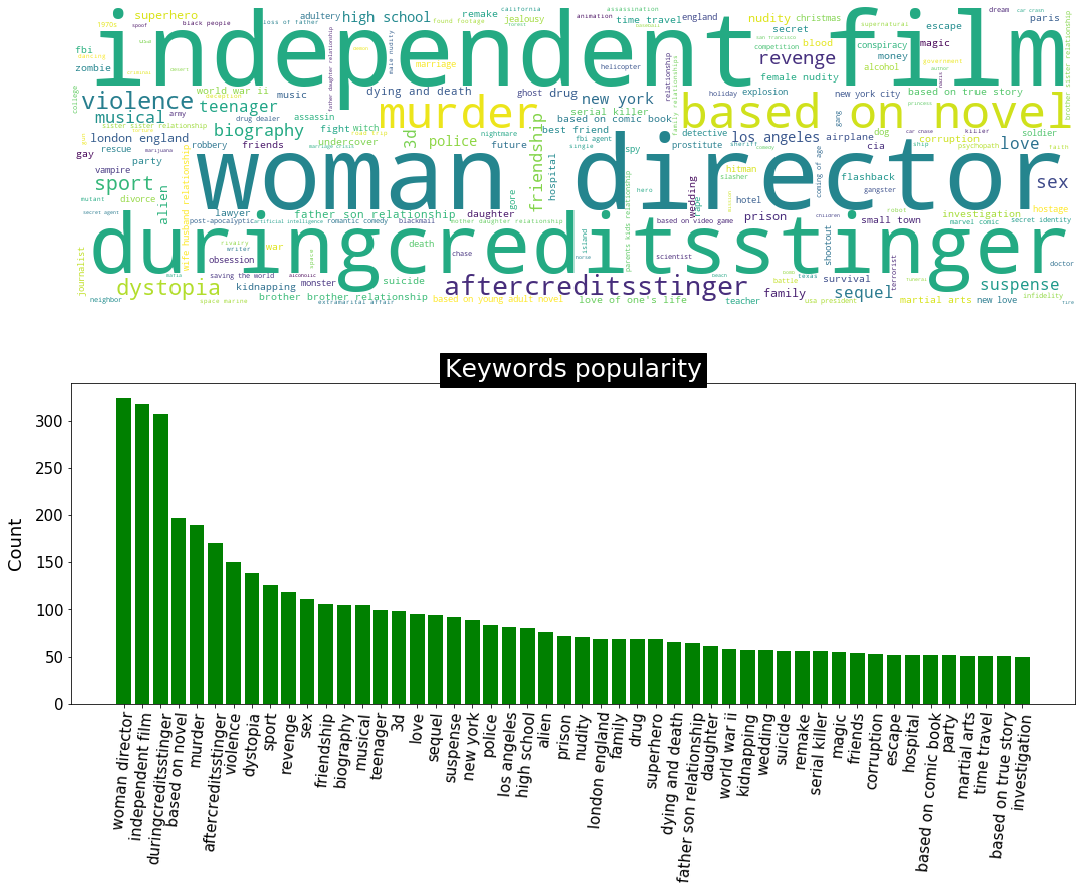

In [23]:
show_wordcloud_hist(movie_df, 'keywords')

### The most produced genres

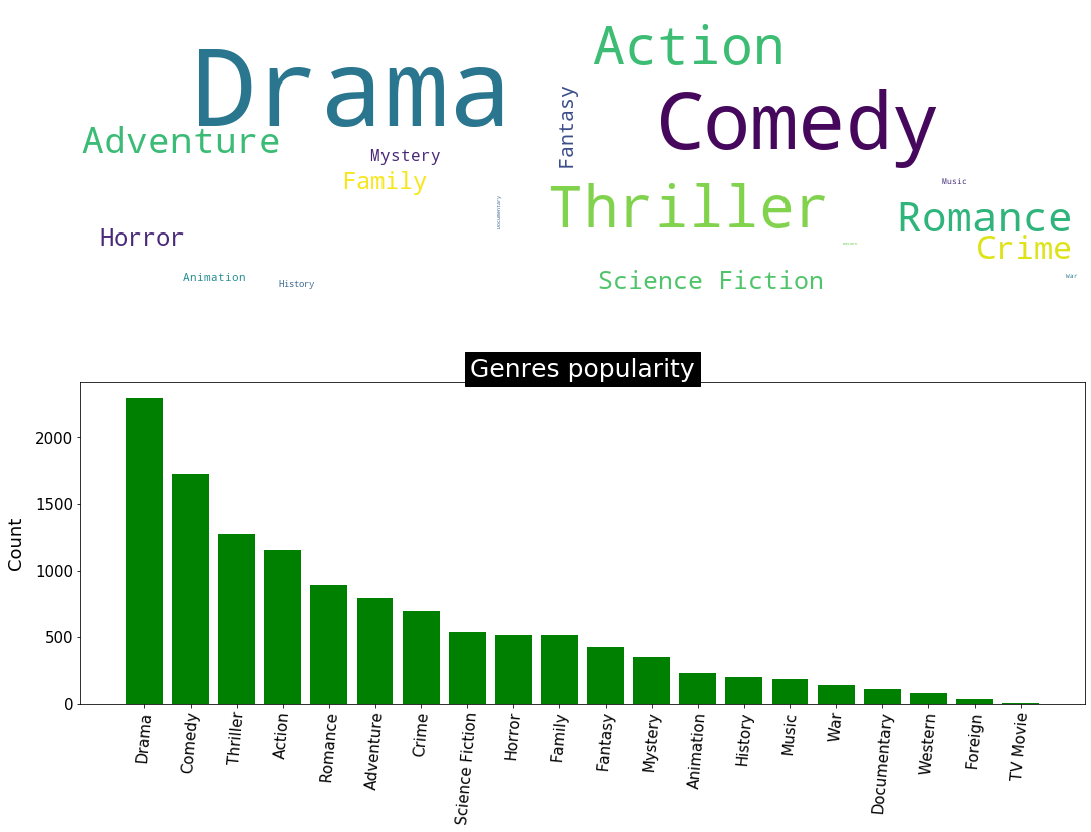

In [24]:
show_wordcloud_hist(movie_df, 'genres')

### Company that produced the most film

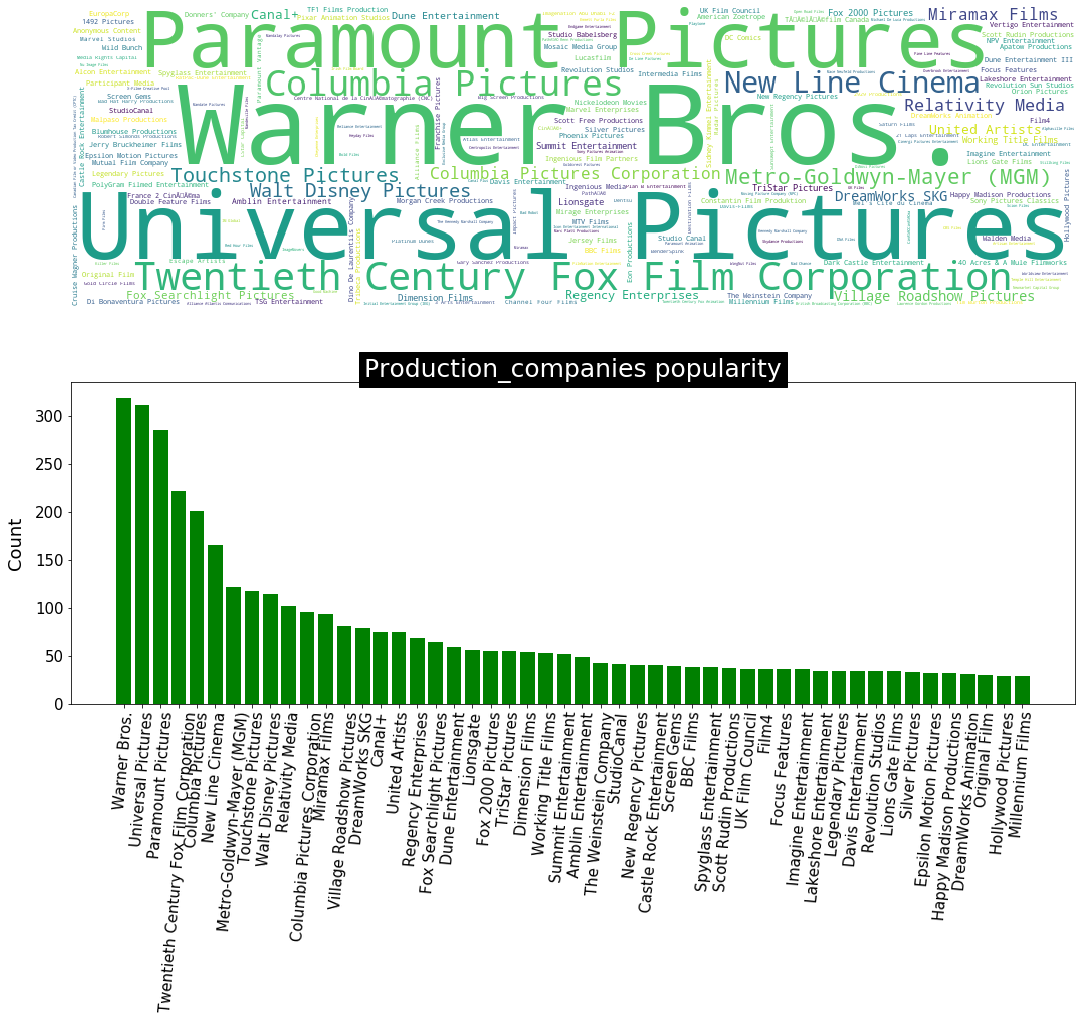

In [25]:
show_wordcloud_hist(movie_df, 'production_companies')

### Top 30 movies that used the highest budget, generated the most revenue, get the highest popularity and vote_count

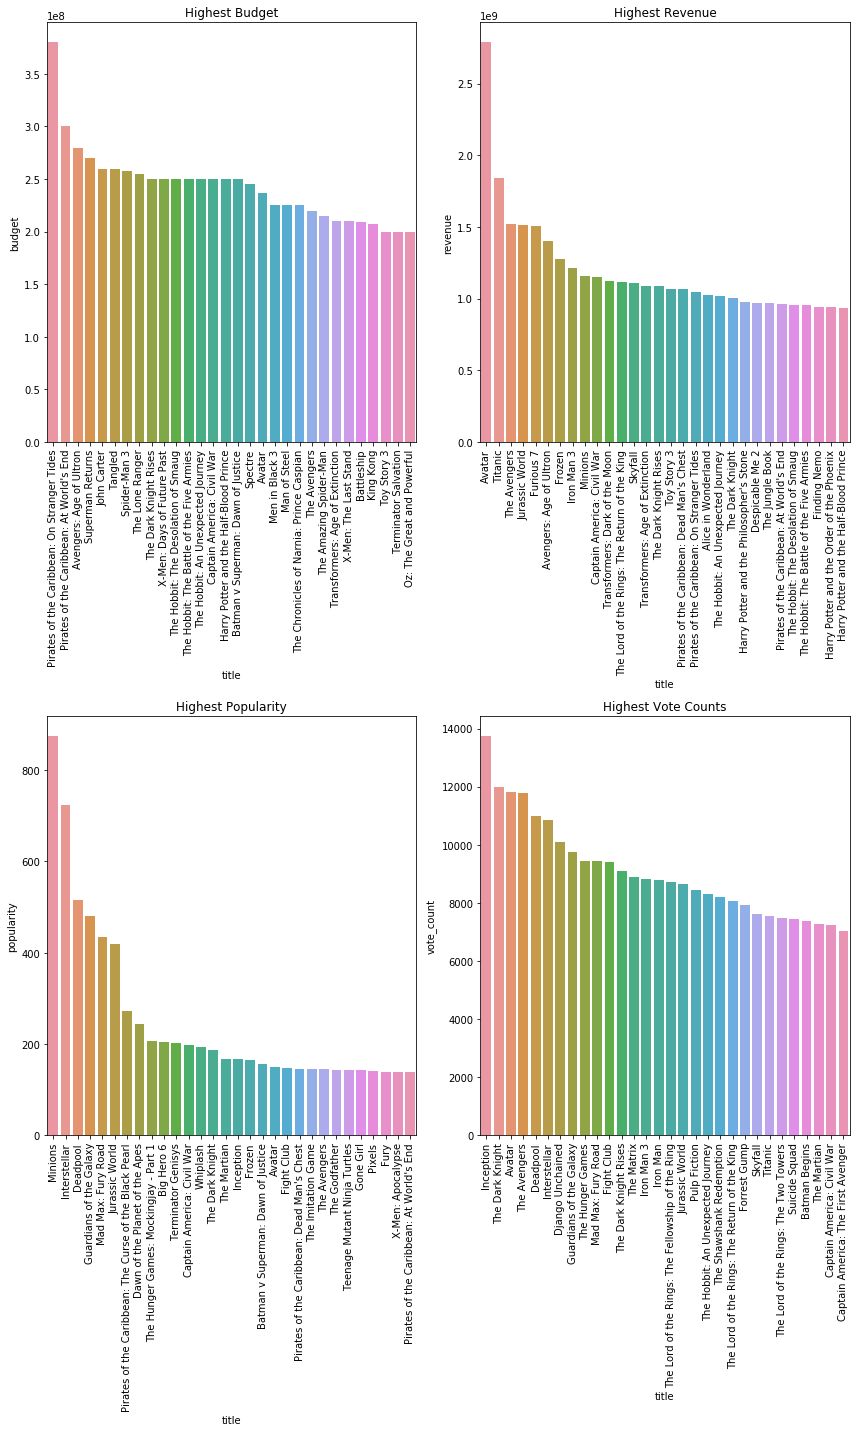

In [26]:
n=30
plt.figure(figsize=(12,20))
plt.subplot(2,2,1)
plt.xticks(rotation=90)
plt.title('Highest Budget')
sns.barplot(data = movie_df.loc[movie_df['budget'].sort_values(ascending = False).head(n).index], x='title', y='budget')
plt.subplot(2,2,2)
plt.xticks(rotation=90)
plt.title('Highest Revenue')
sns.barplot(data = movie_df.loc[movie_df['revenue'].sort_values(ascending = False).head(n).index], x='title', y='revenue')
plt.subplot(2,2,3)
plt.xticks(rotation=90)
plt.title('Highest Popularity')
sns.barplot(data = movie_df.loc[movie_df['popularity'].sort_values(ascending = False).head(n).index], x='title', y='popularity')
plt.tight_layout()
plt.subplot(2,2,4)
plt.xticks(rotation=90)
plt.title('Highest Vote Counts')
sns.barplot(data = movie_df.loc[movie_df['vote_count'].sort_values(ascending = False).head(n).index], x='title', y='vote_count')
plt.tight_layout()

### Number of movies that produced year after year

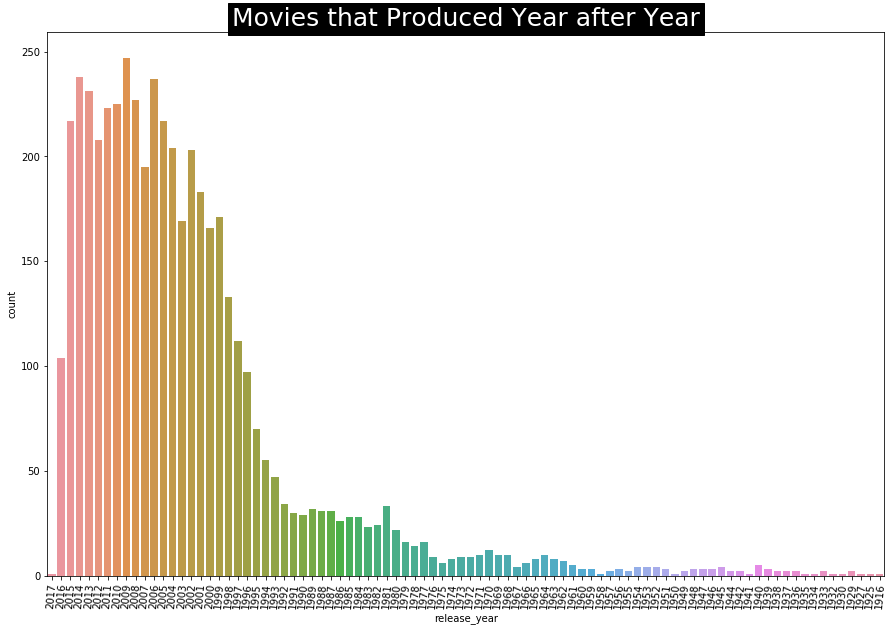

In [27]:
list_x = sorted(movie_df['release_year'].unique(), reverse=True)
plt.figure(figsize=(15,10))
plt.xticks(rotation=85, fontsize = 10)
plt.title(f"Movies that Produced Year after Year",bbox={'facecolor':'k'},color='w',fontsize = 25)
sns.countplot(movie_df['release_year'], order = list_x)

### Revenue Sum and Max

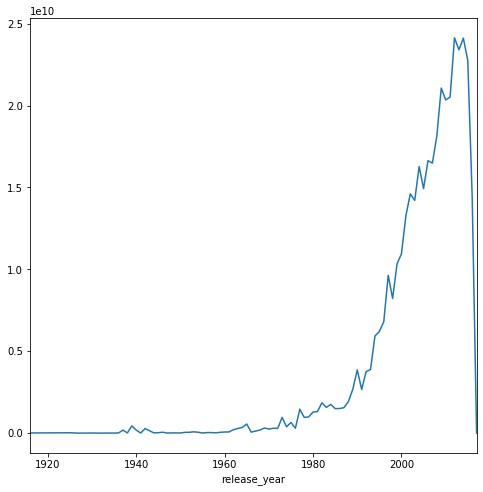

In [28]:
plt.figure(figsize=(8,8))
movie_df.groupby('release_year').sum()['revenue'].plot()

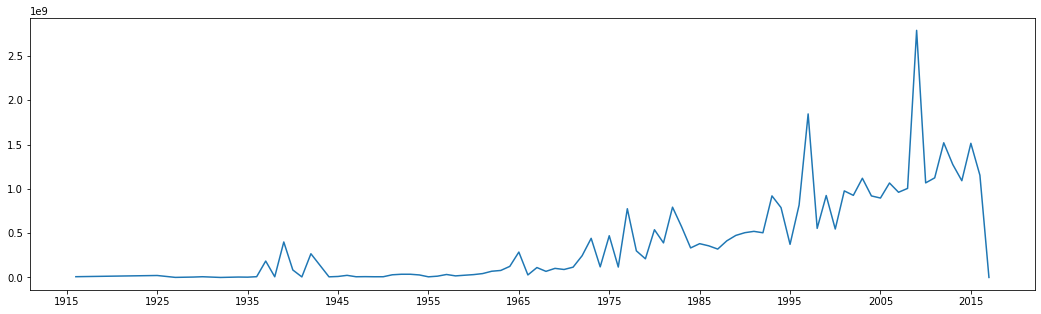

In [29]:
df=movie_df
plt.figure(figsize=(18,5))
year_revenue = df.groupby('release_year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1915, 2016, 10))
plt.show()

### Budget Sum and Max

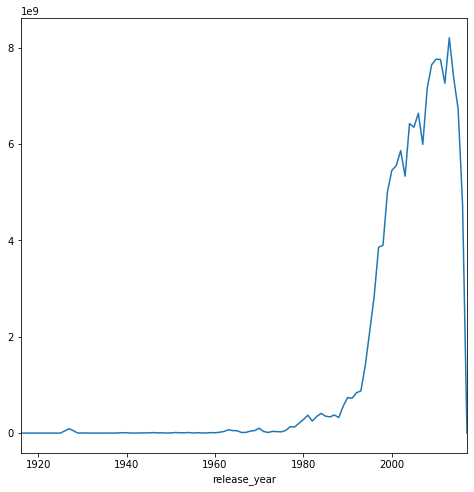

In [30]:
plt.figure(figsize=(8,8))
movie_df.groupby('release_year').sum()['budget'].plot()

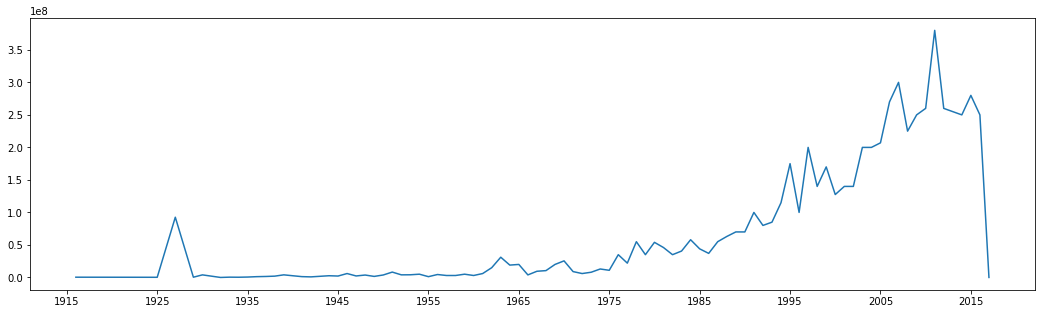

In [31]:
df=movie_df
plt.figure(figsize=(18,5))
year_revenue = df.groupby('release_year')['budget'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1915, 2016, 10))
plt.show()

### Drama, Thriller, Action, Romance, Adventure, Crime, Science Fiction, Horror (plot year after year)

In [32]:
#function for ploting only one class from a column
def show_plot_by_year(df,col,slicer):
    if slicer != None:
        slice_df = df[df[col].str.contains(slicer)]
    else:
        slice_df = df
        slicer = 'All'
        
    list_x = sorted(df['release_year'].unique(), reverse=True)
    plt.figure(figsize=(15,10))
    plt.xticks(rotation=85, fontsize = 10)
    plt.title(f"{slicer.capitalize()} {col.capitalize()} Year after Year",bbox={'facecolor':'k'},color='w',fontsize = 25)
    sns.countplot(slice_df['release_year'], order = list_x)
    plt.show()

In [33]:
movie_copy = movie_df.fillna('')

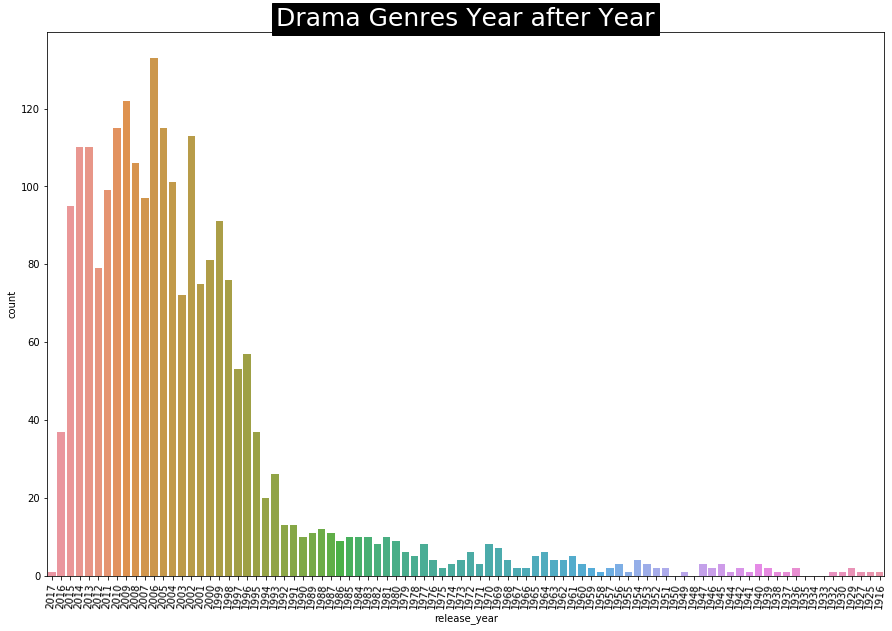

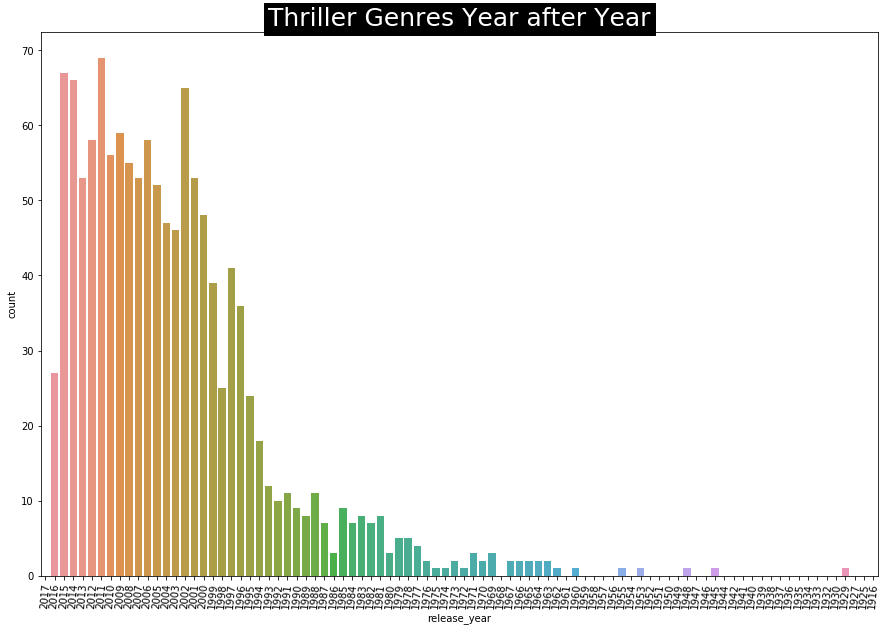

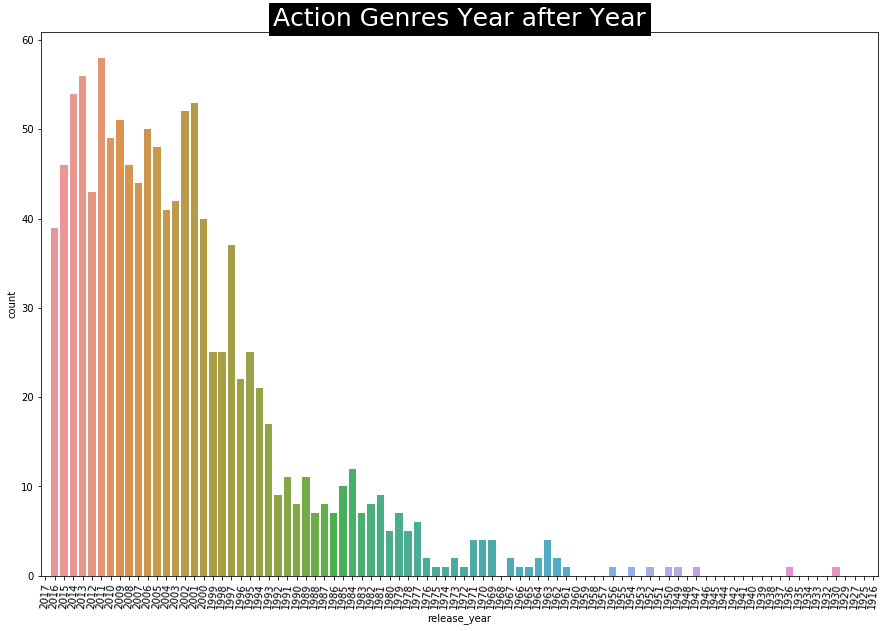

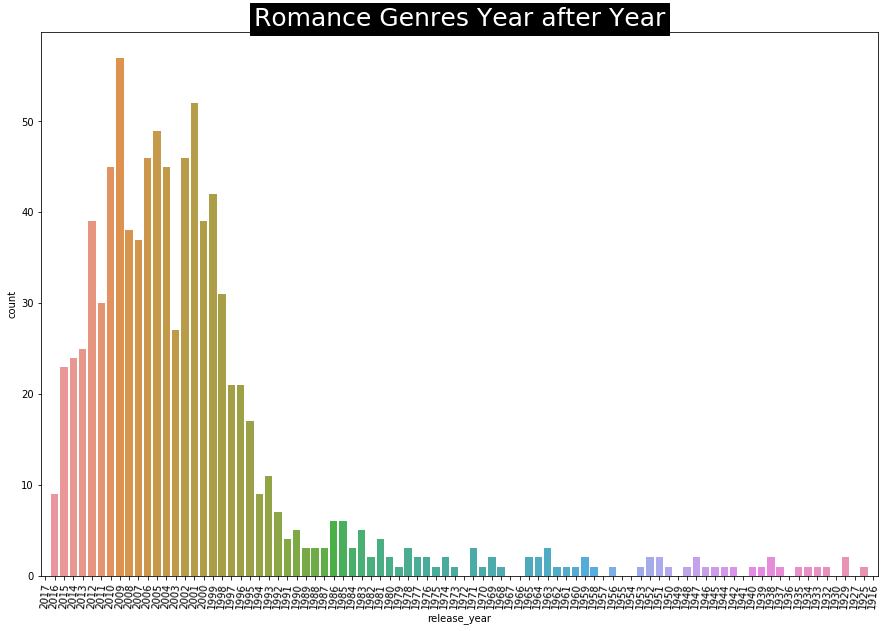

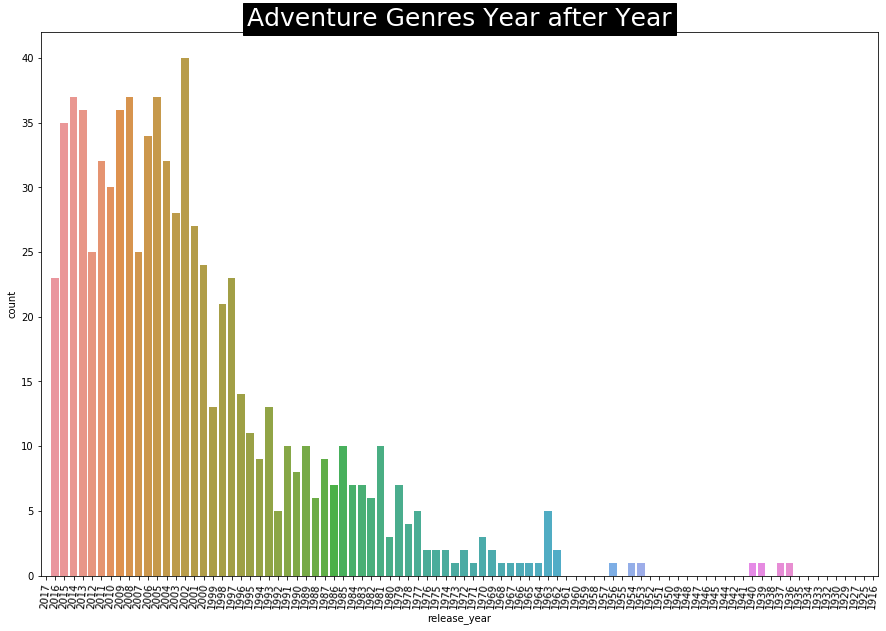

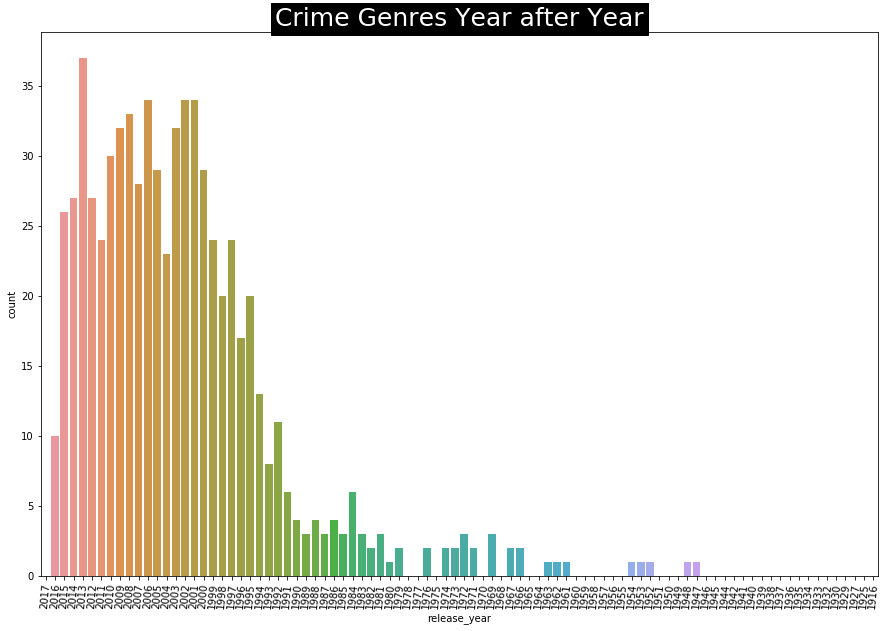

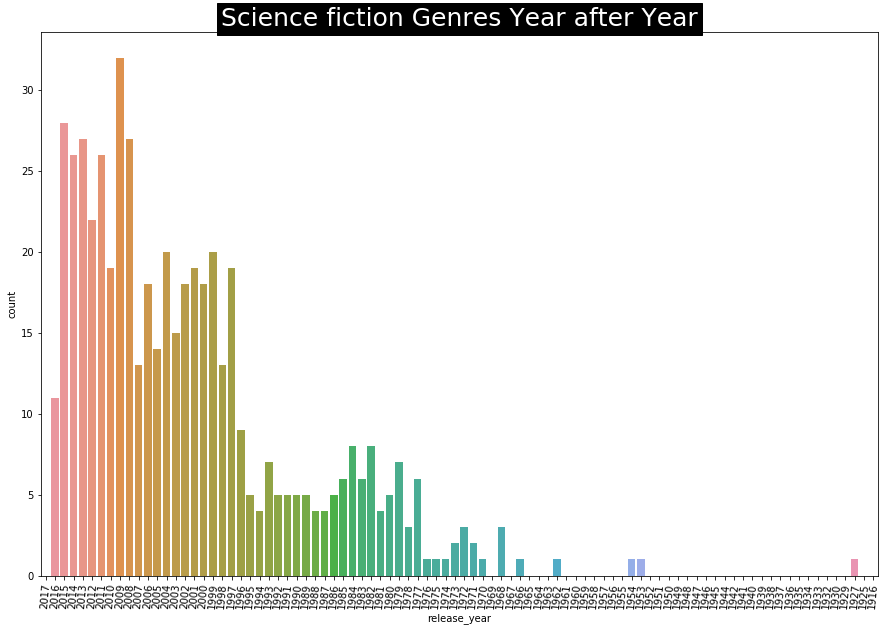

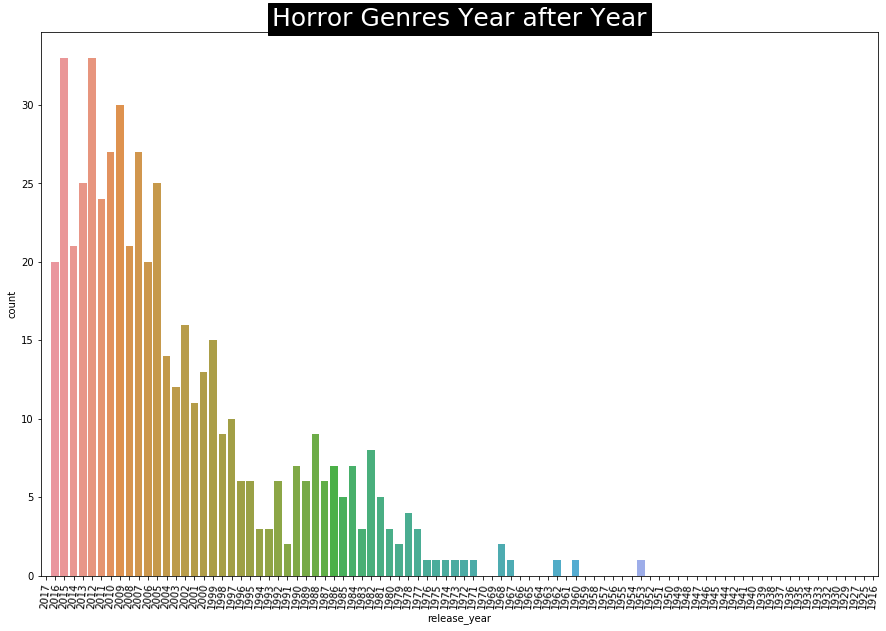

In [34]:
for i in ['Drama', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Science Fiction', 'Horror']:
    show_plot_by_year(movie_copy,'genres' ,i)

### Number of film produced by top 14 companies that produced the most film year after year

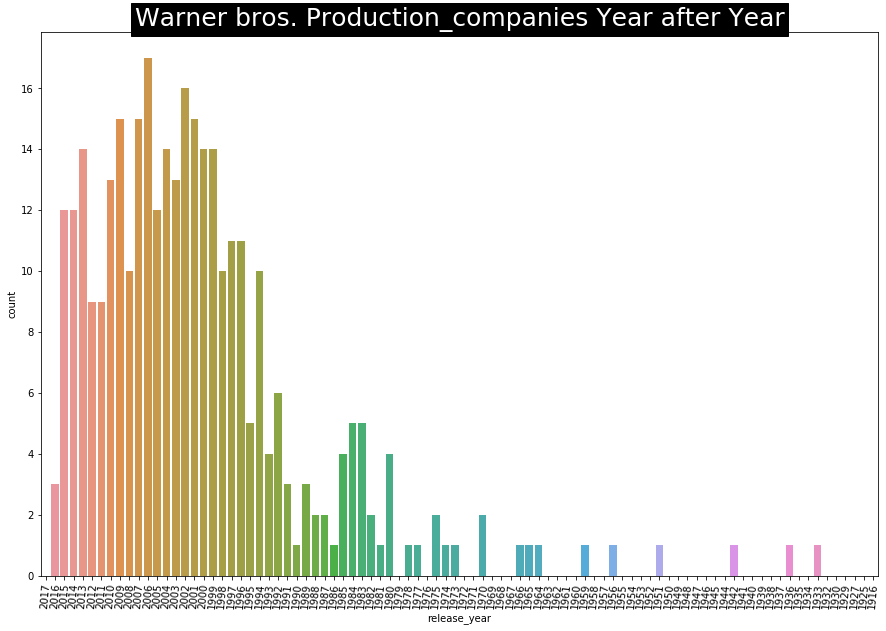

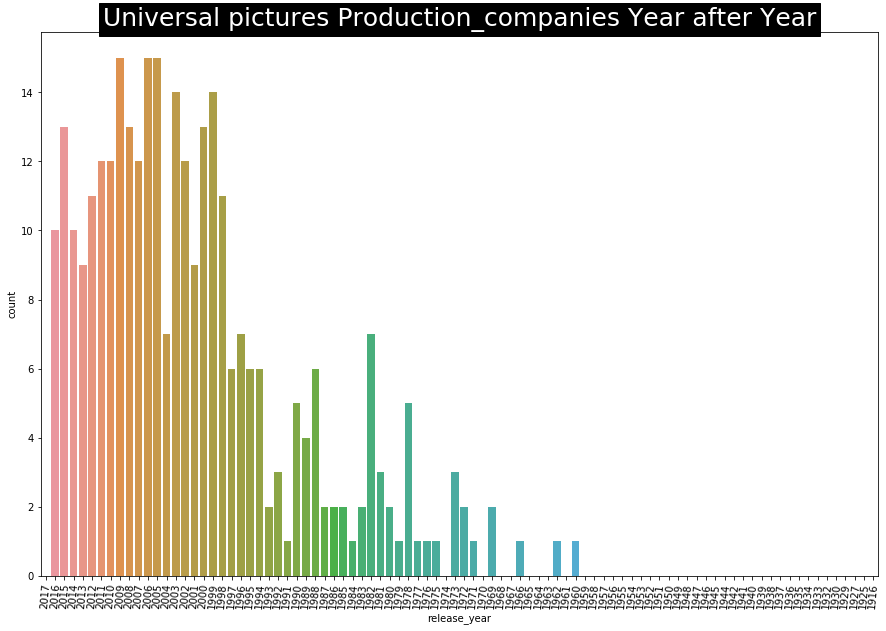

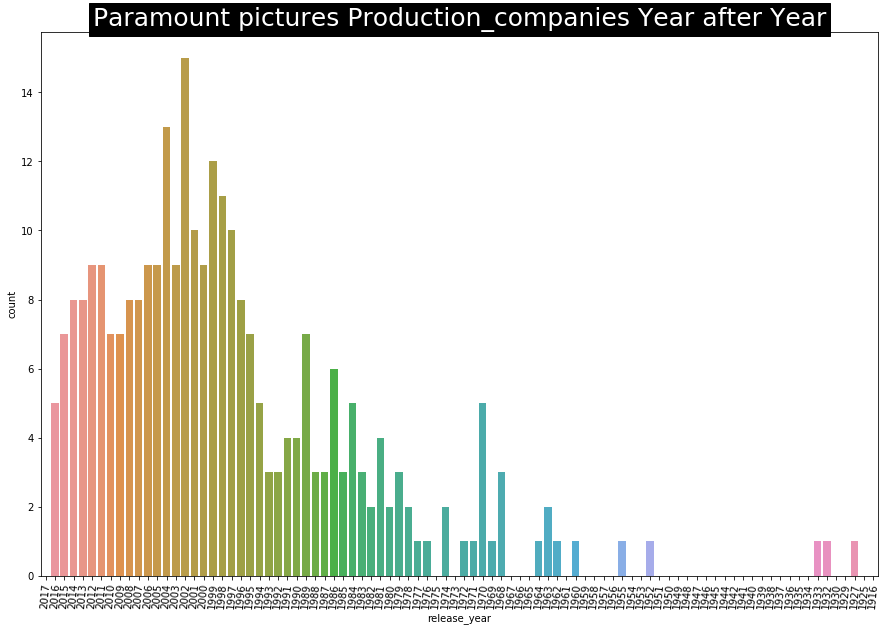

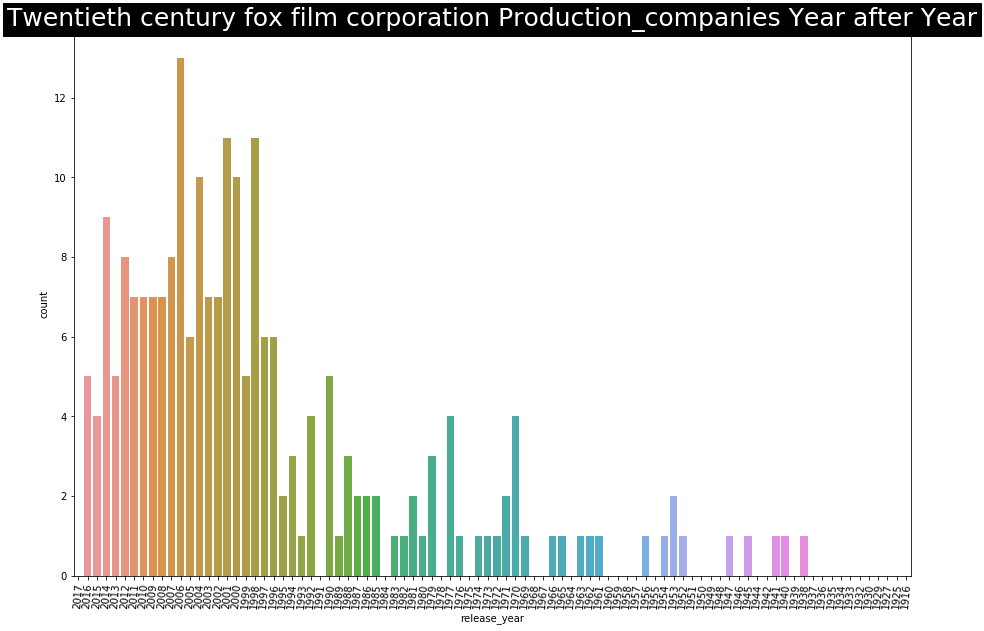

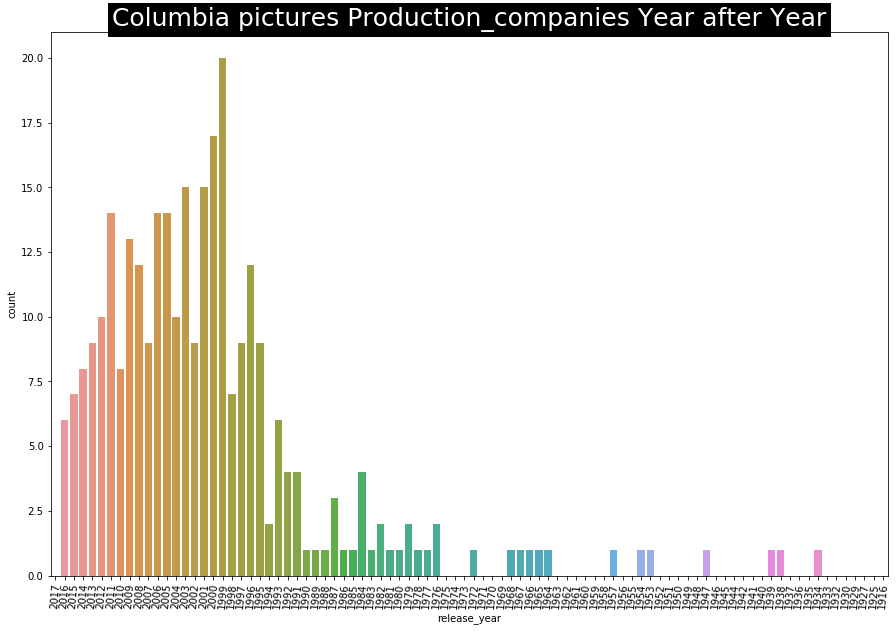

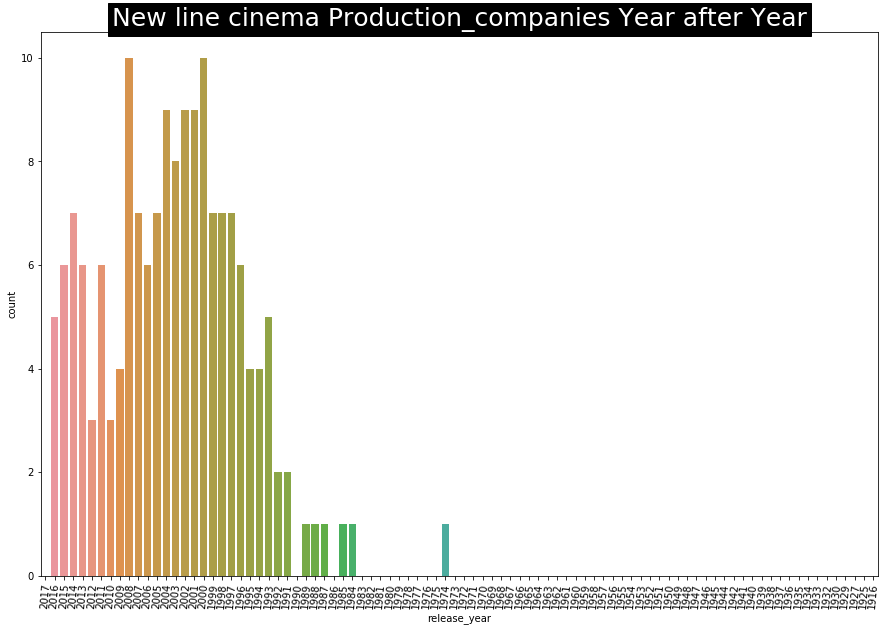

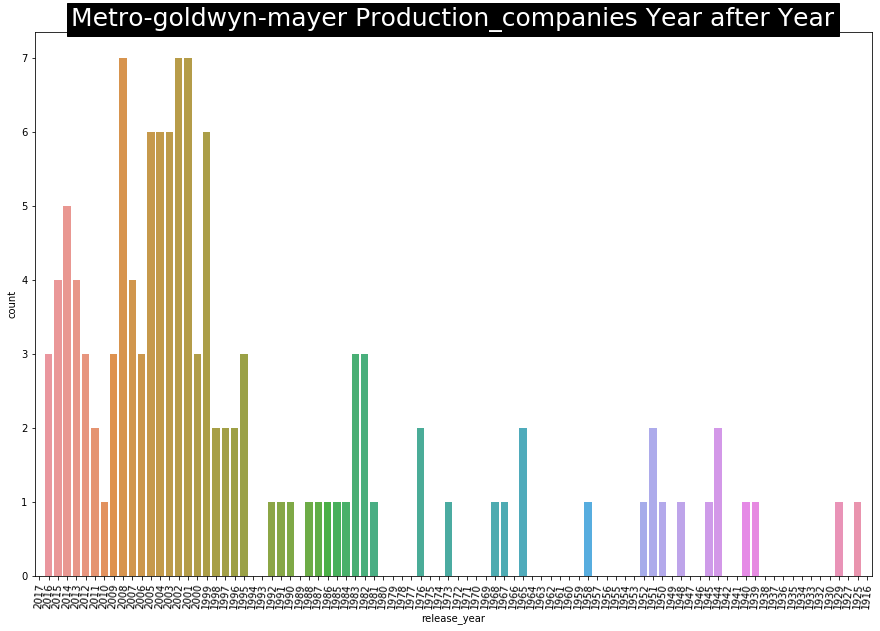

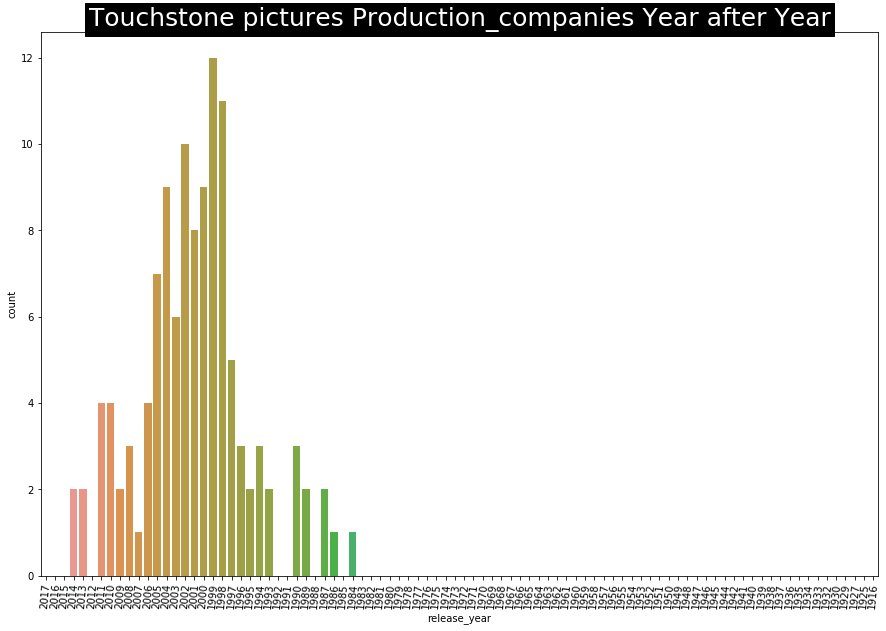

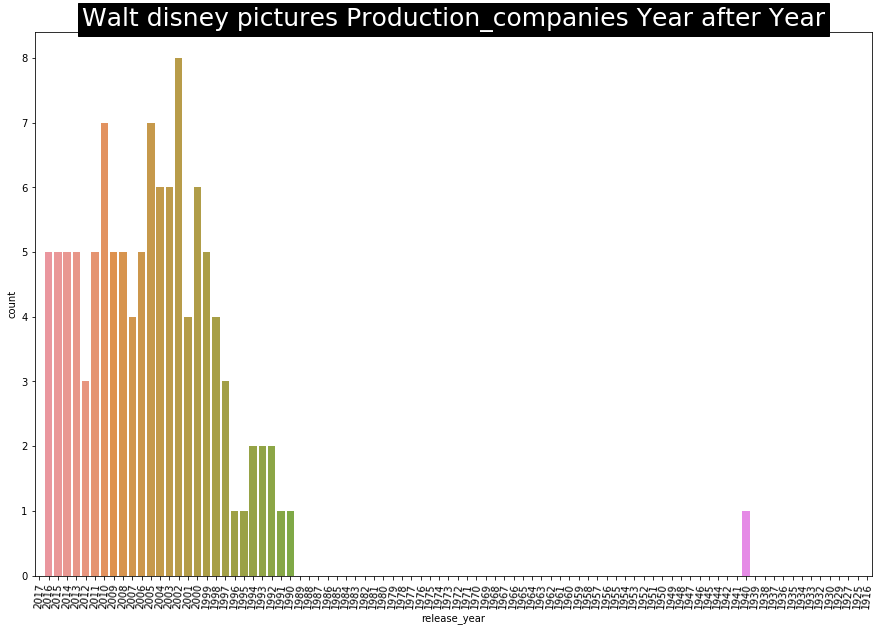

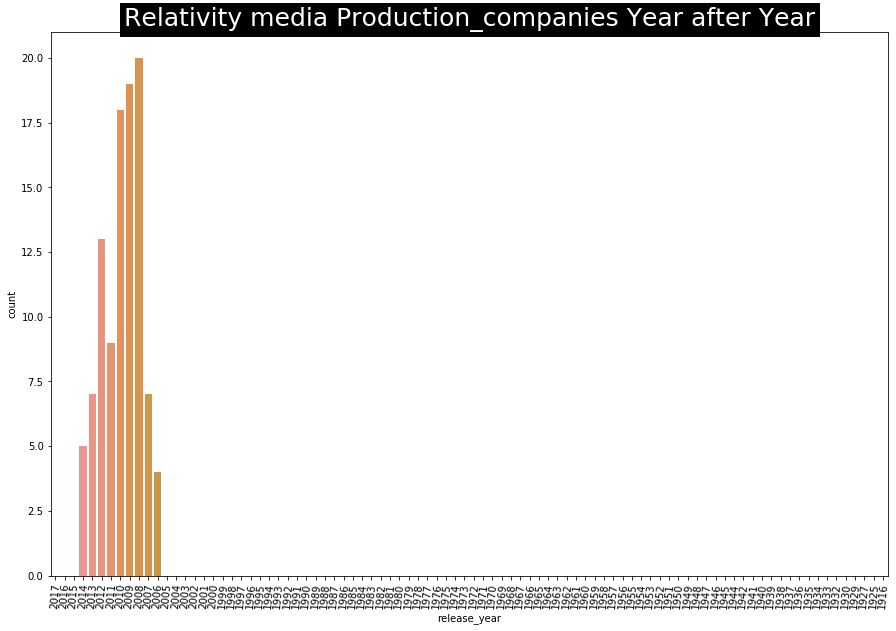

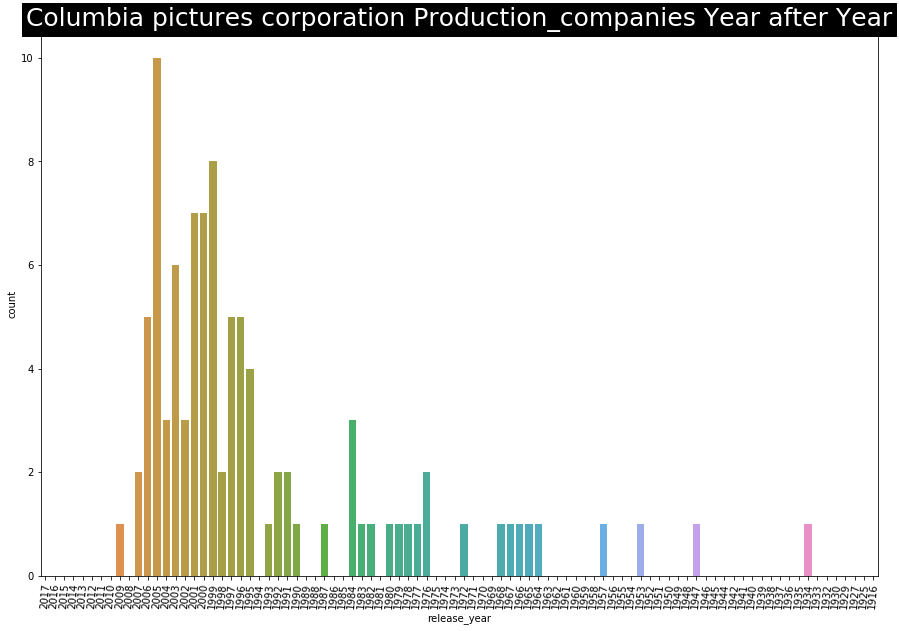

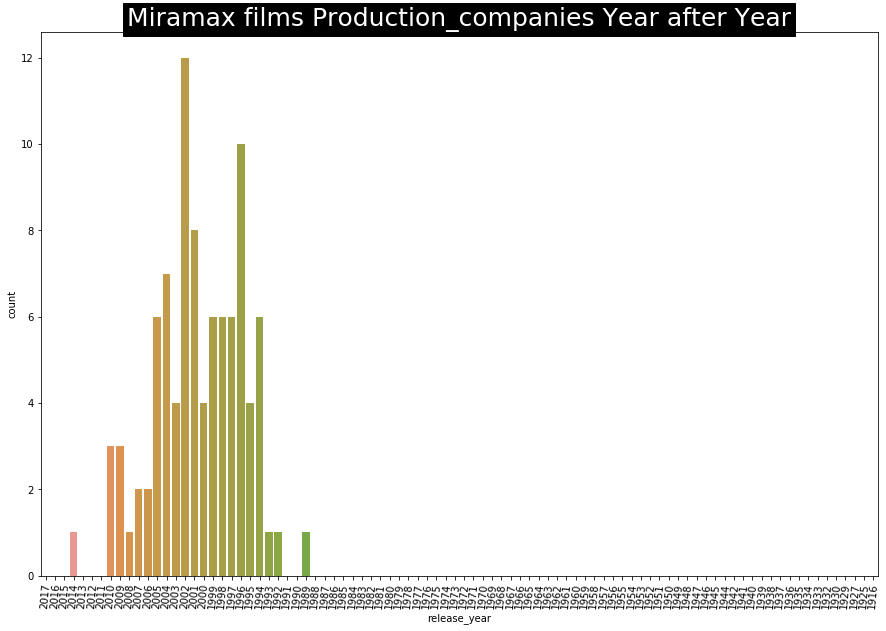

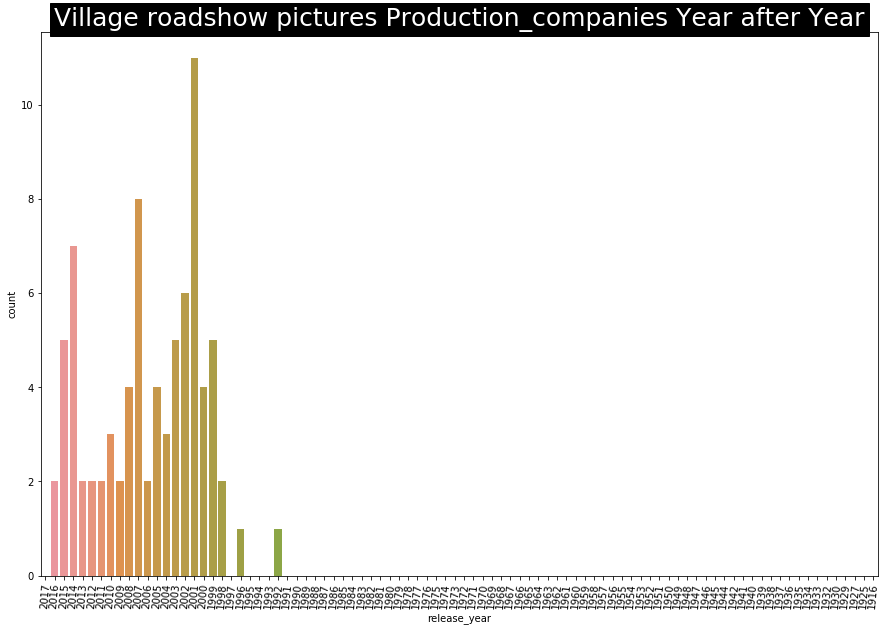

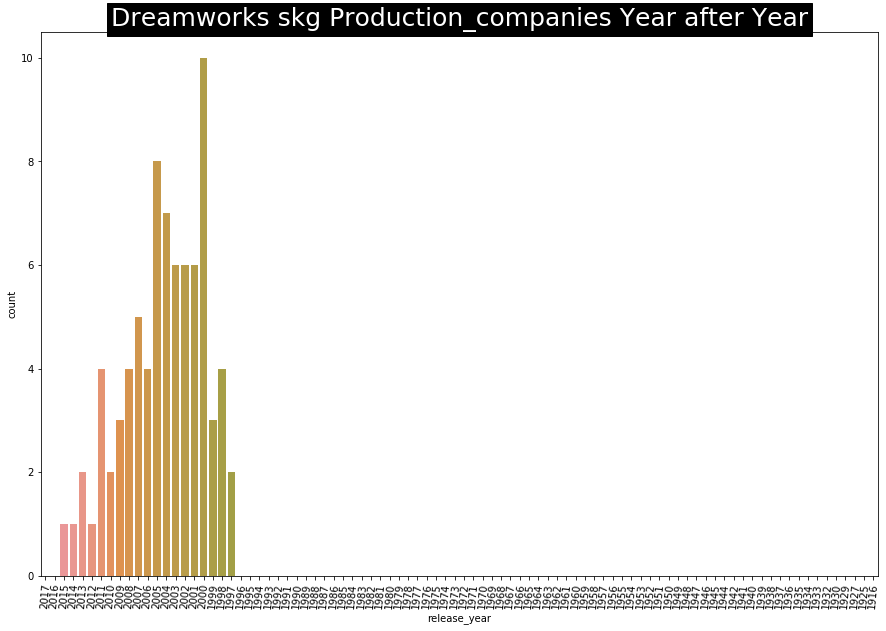

In [35]:
for i in ['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 
          'New Line Cinema', 'Metro-Goldwyn-Mayer', 'Touchstone Pictures', 'Walt Disney Pictures', 'Relativity Media', 
          'Columbia Pictures Corporation', 'Miramax Films', 'Village Roadshow Pictures', 'DreamWorks SKG']:
    show_plot_by_year(movie_copy,'production_companies' ,i)

### Genres produced by top 14 companies that produced the most film

In [36]:
#wordcloud and histogram groupby slicer
def show_plot_groupby(df,col,gb_col,slicer):
    slice_df = df[df[gb_col].str.contains(slicer)]
    title = f'{col.capitalize()} produced by {slicer}'
    show_wordcloud_hist(slice_df, col, title)

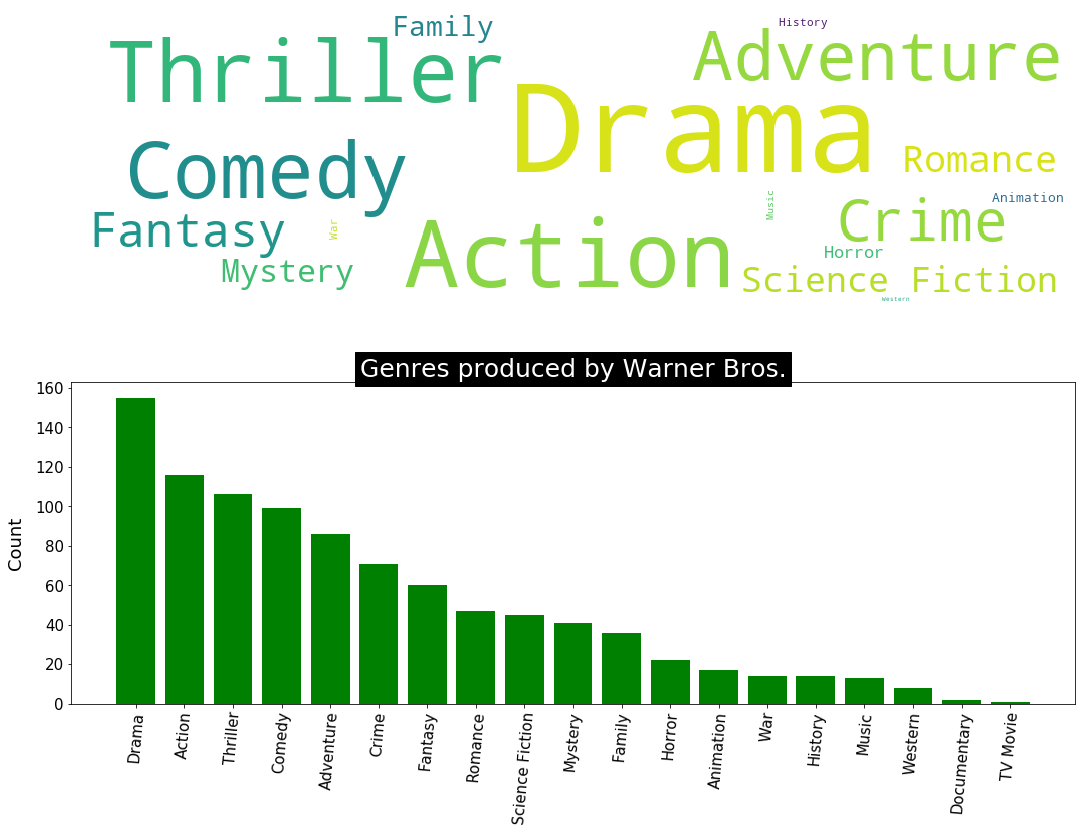

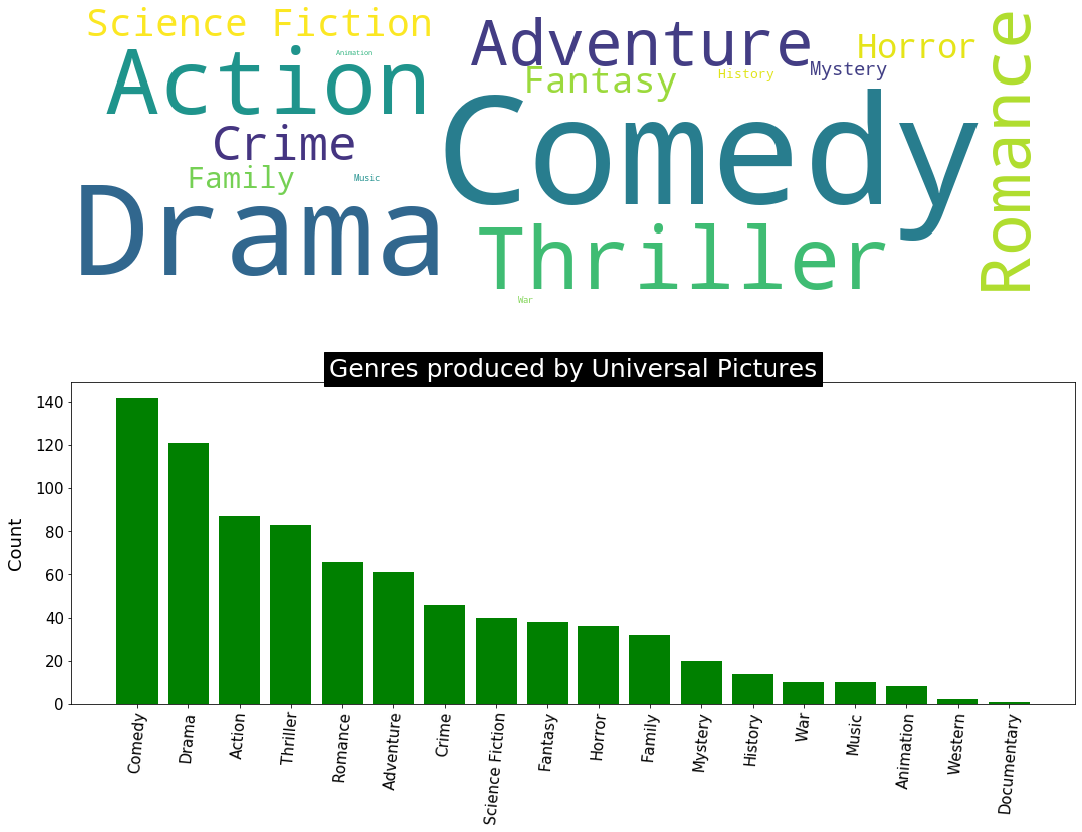

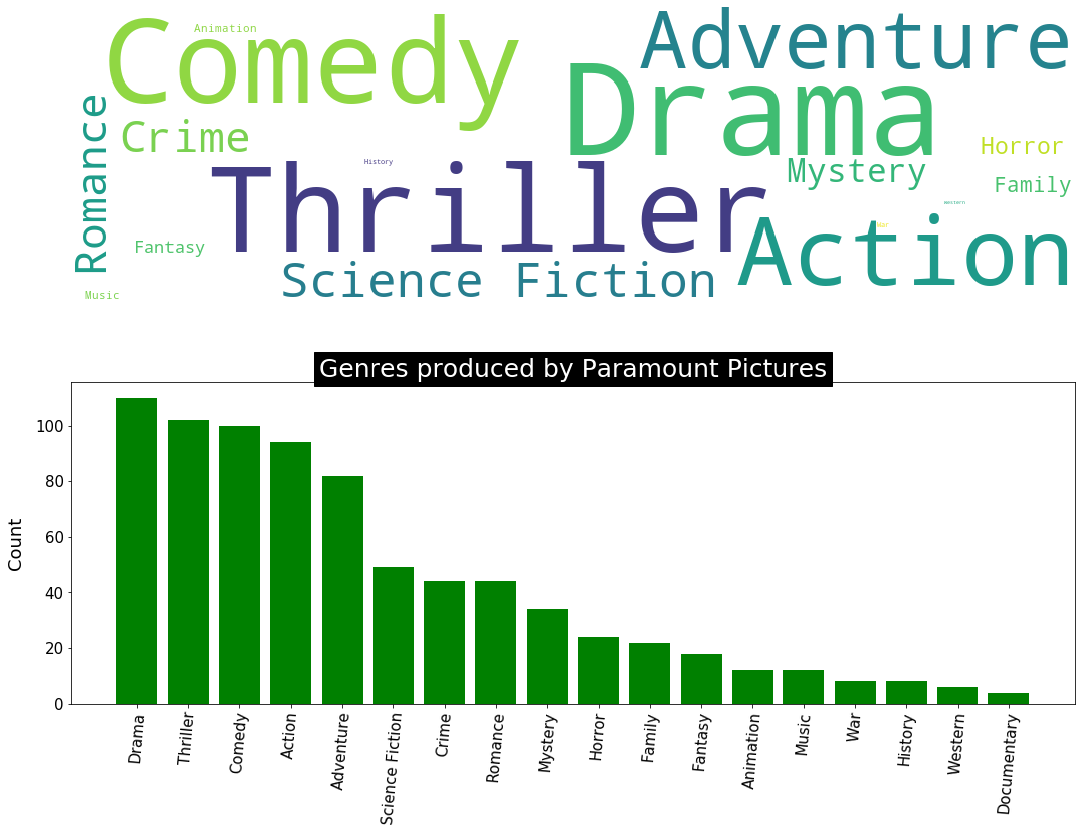

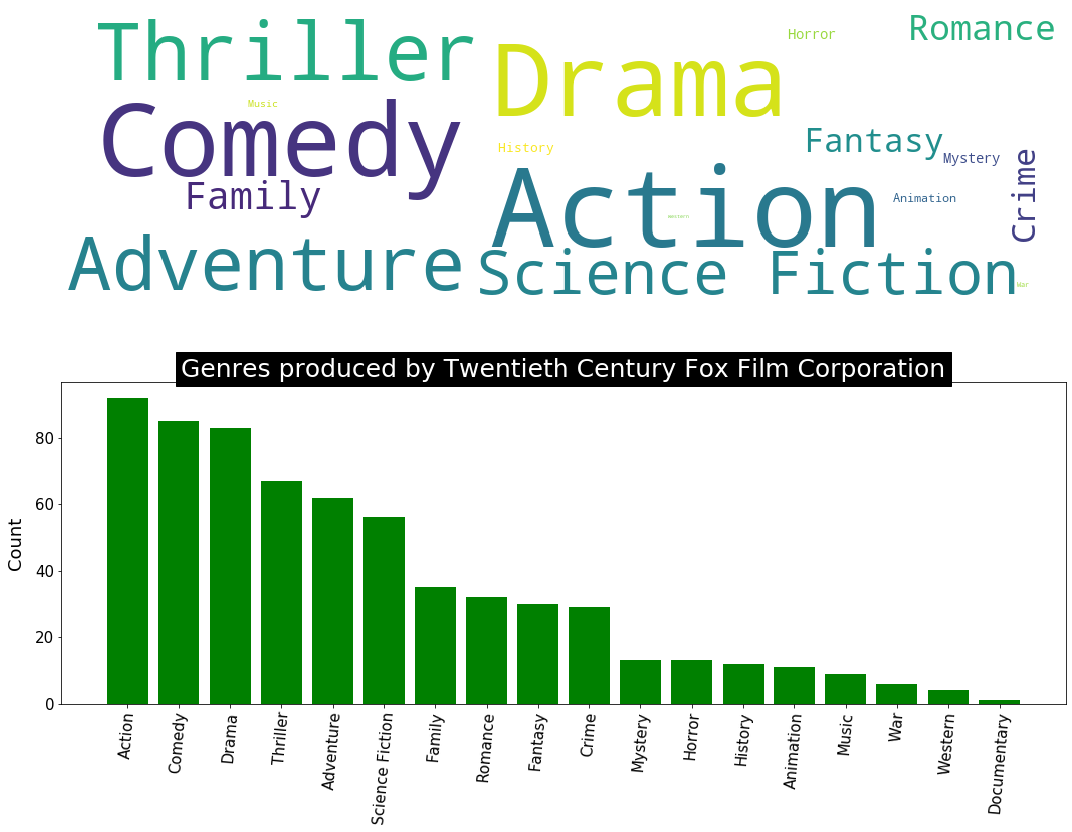

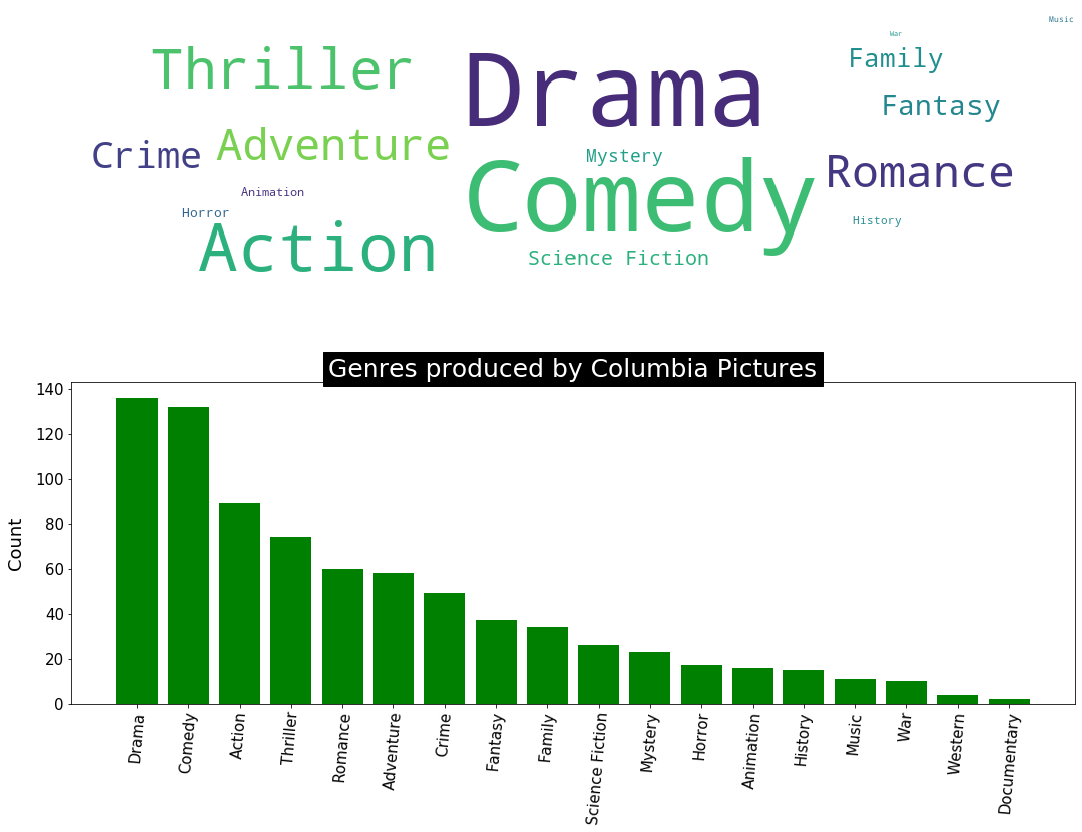

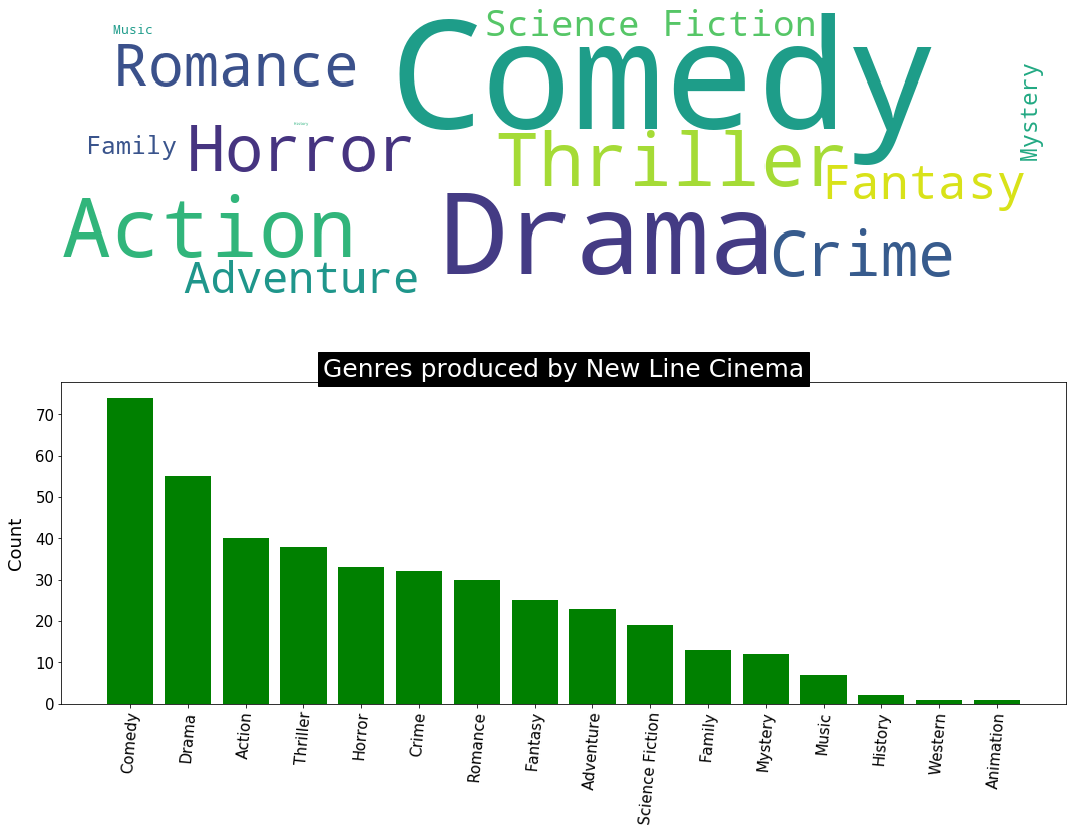

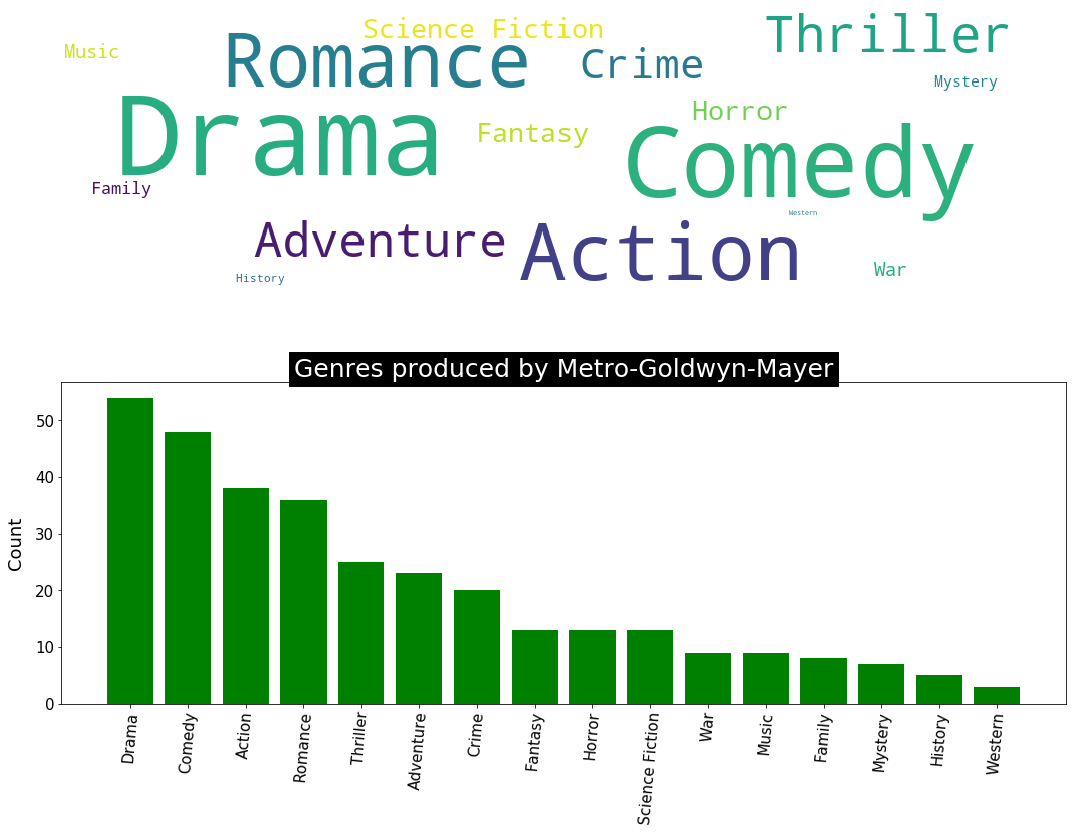

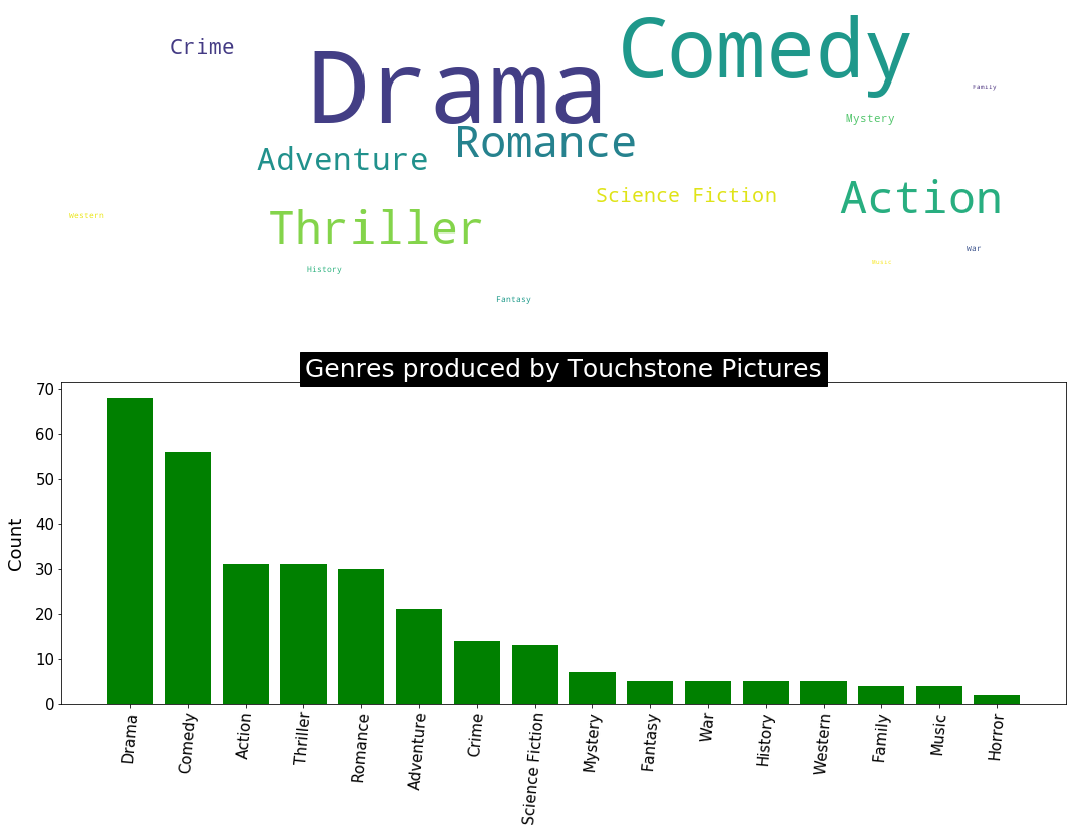

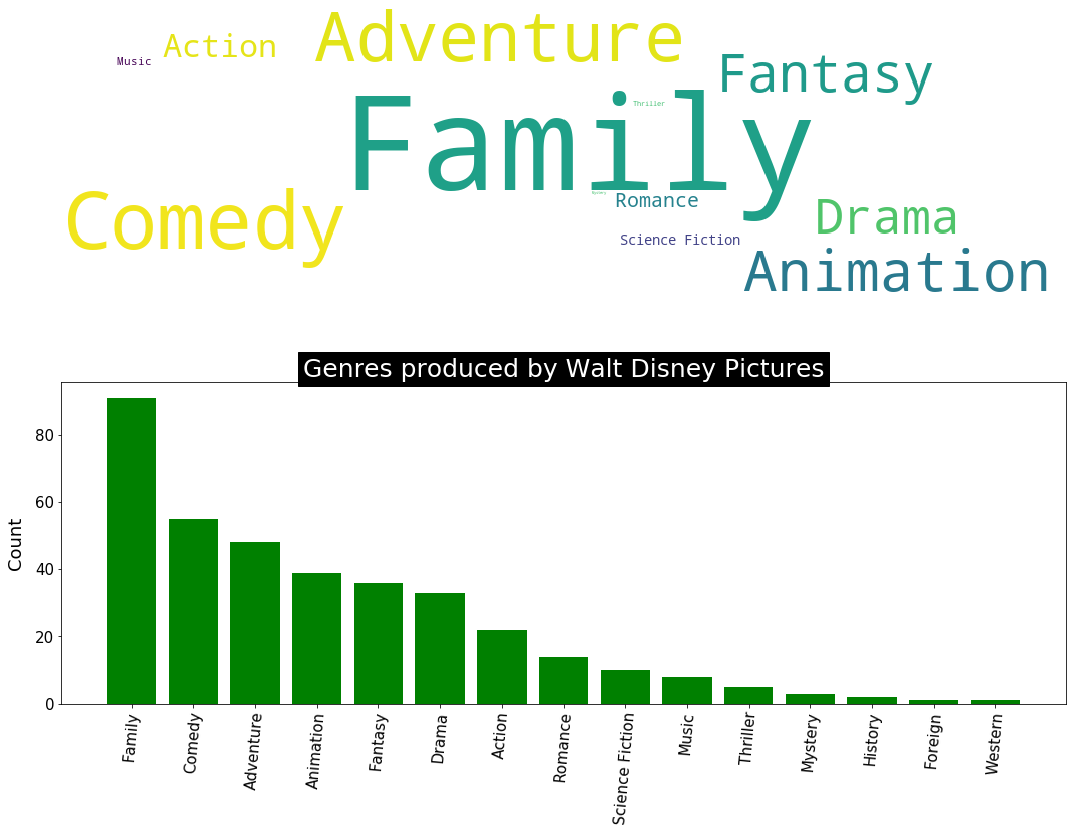

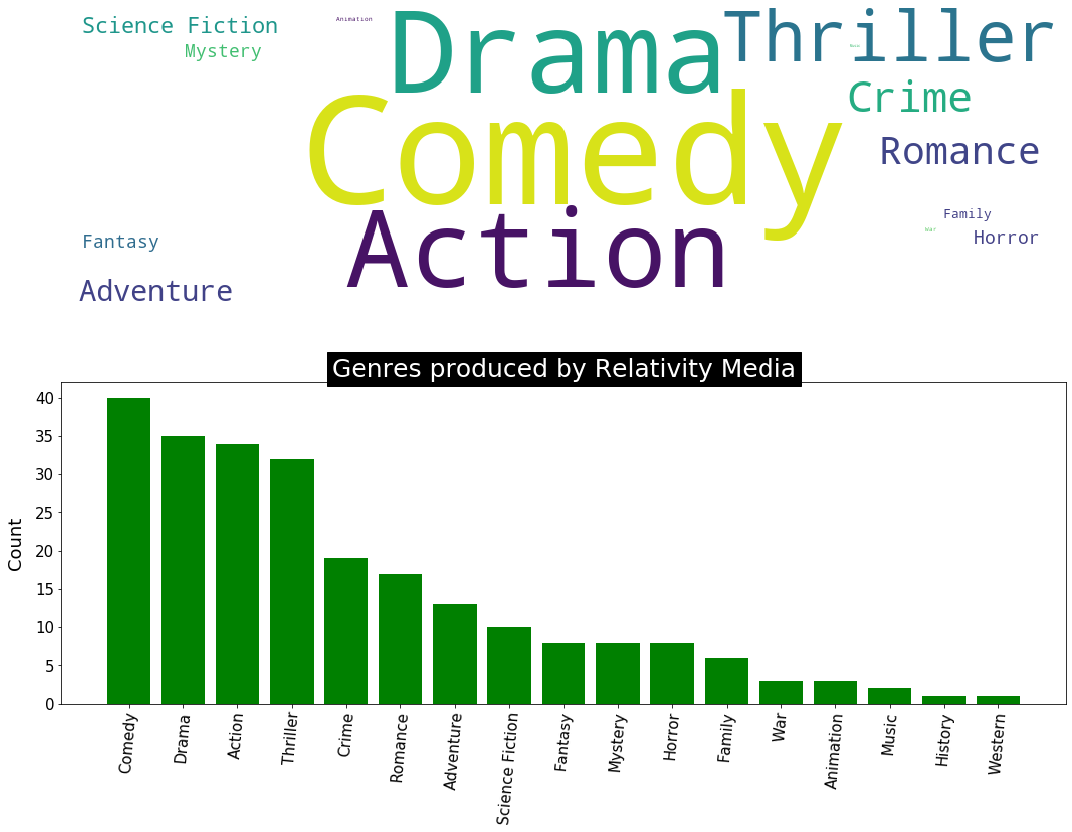

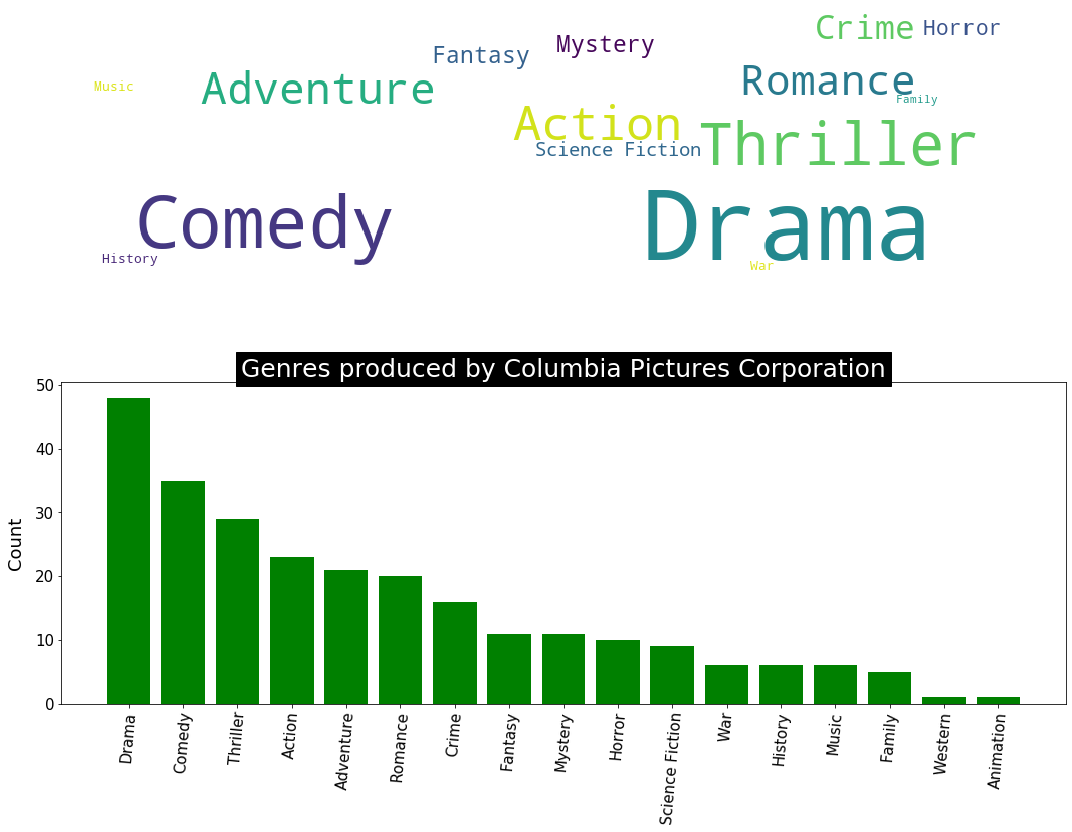

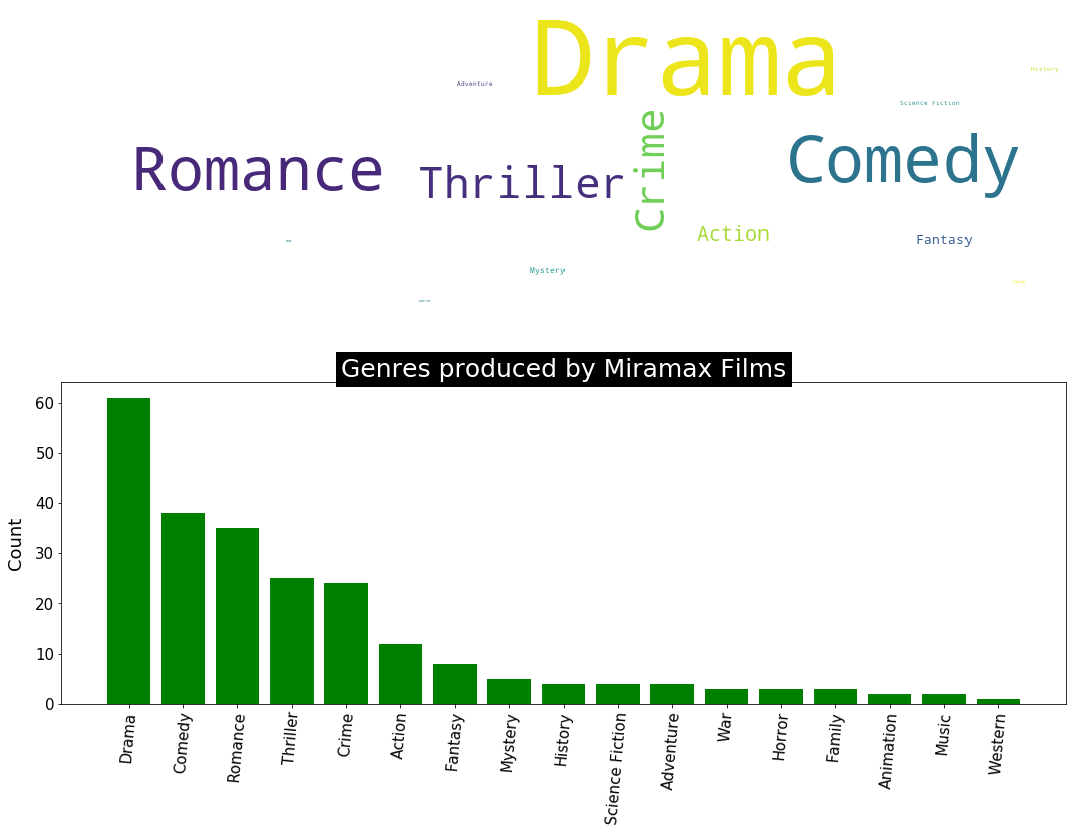

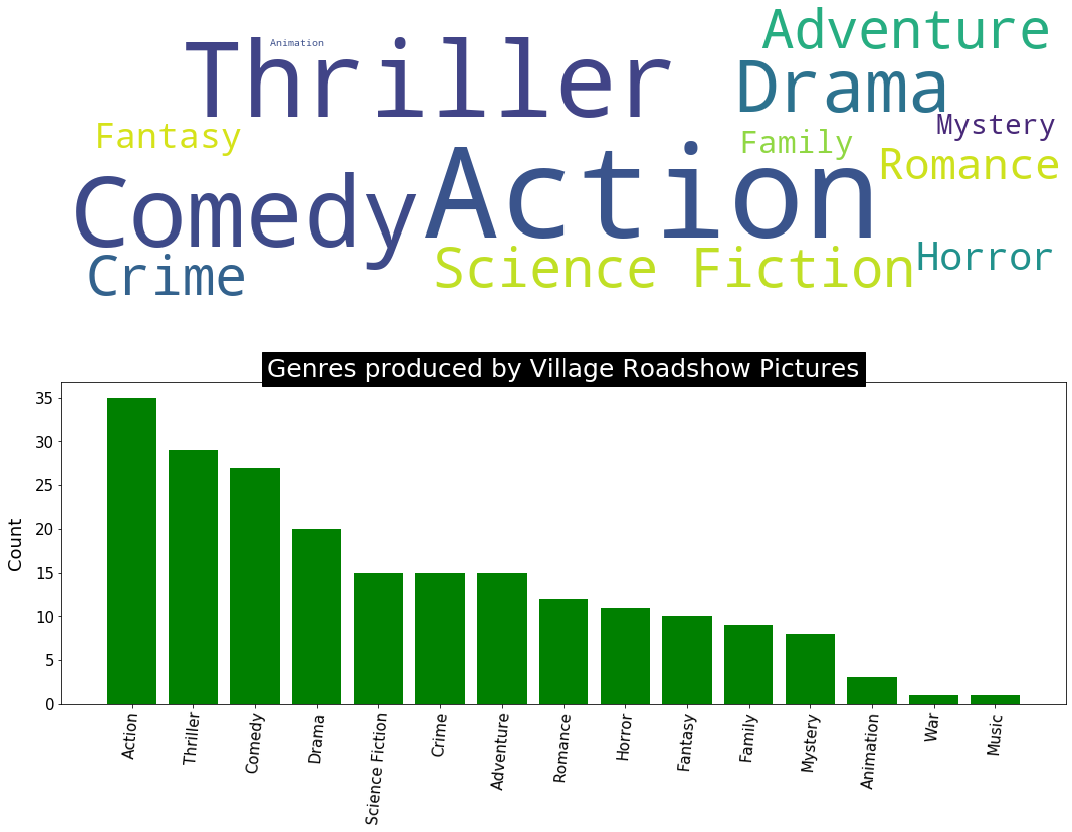

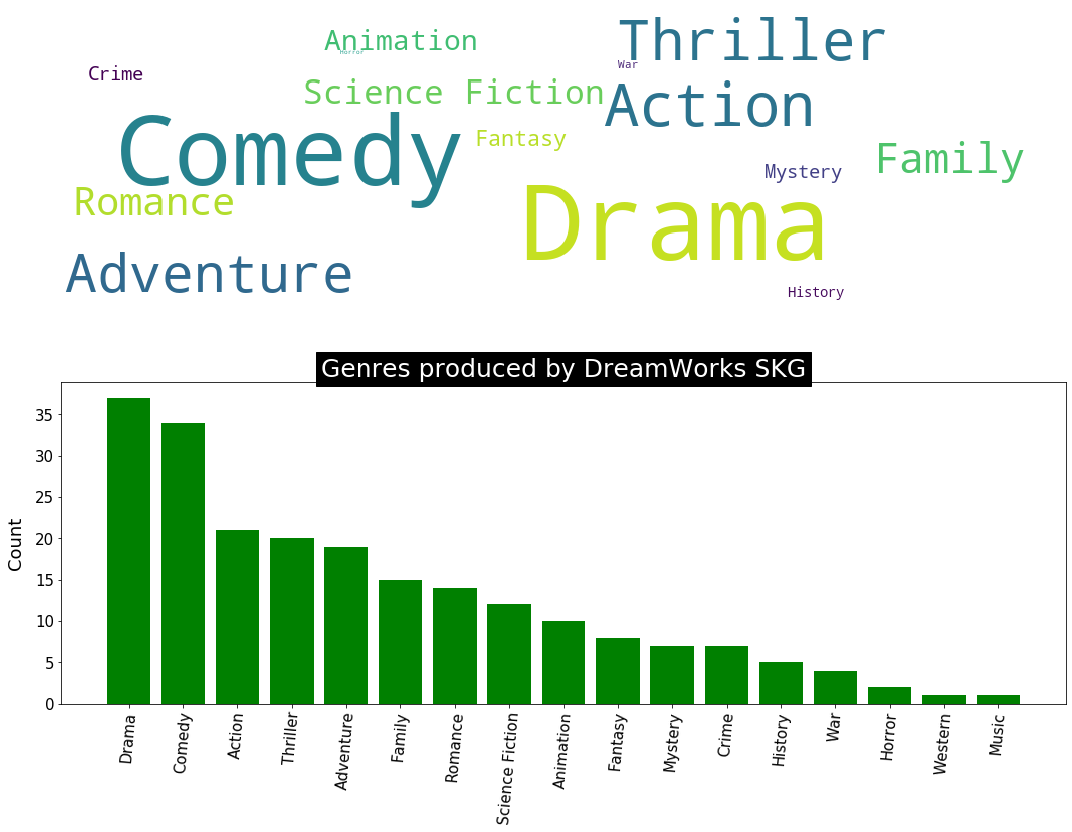

In [37]:
for i in ['Warner Bros.', 'Universal Pictures', 'Paramount Pictures', 'Twentieth Century Fox Film Corporation', 'Columbia Pictures', 
          'New Line Cinema', 'Metro-Goldwyn-Mayer', 'Touchstone Pictures', 'Walt Disney Pictures', 'Relativity Media', 
          'Columbia Pictures Corporation', 'Miramax Films', 'Village Roadshow Pictures', 'DreamWorks SKG']:
    show_plot_groupby(movie_copy,'genres','production_companies',i)

### Production Countries (Apart from US)

In [38]:
word_list, word_dict = count_word(movie_df, 'production_countries')
con_df = pd.DataFrame(word_list, columns=['country','num_movies'])

In [39]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### 15 Genre, Director, Company, Actor that generated the most revenue

In [40]:
def sum_col_by_gb_col(df, col, gb_col):
    list_word = make_set(df,gb_col)
    #make dict for count category
    keyword_count = dict()

    #fill dict key with words set default value to 0
    for i in list_word: keyword_count[i] = 0
    
    #loop all data from col and gb_col
    for col_val, gb_col_val in zip(df[col],df[gb_col]):
        #skip NaN
        if isinstance(gb_col_val, float): continue
        #loop all the category in one row
        for gb_key in gb_col_val.split(','):
            #add col values to gb_col category
            if gb_key in list_word:
                keyword_count[gb_key] += col_val
    #______________________________________________________________________
    
    # convert sort the dictionary return as list of tupples
    keyword_occurences = sorted(keyword_count.items(), key=lambda x:x[1], reverse=True)

    #return sorted list and unsorted dict
    temp_df = pd.DataFrame(keyword_occurences, columns=[gb_col, col]).head(15)
    plt.figure(figsize=(8,8))
    plt.xticks(rotation=90)
    sns.barplot(data=temp_df, x=gb_col, y=col)
    plt.show()

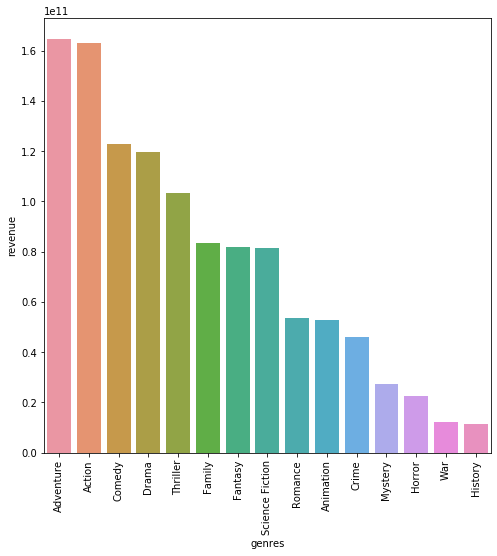

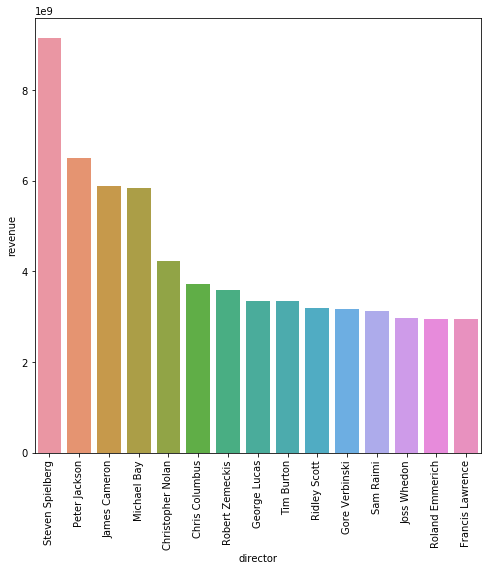

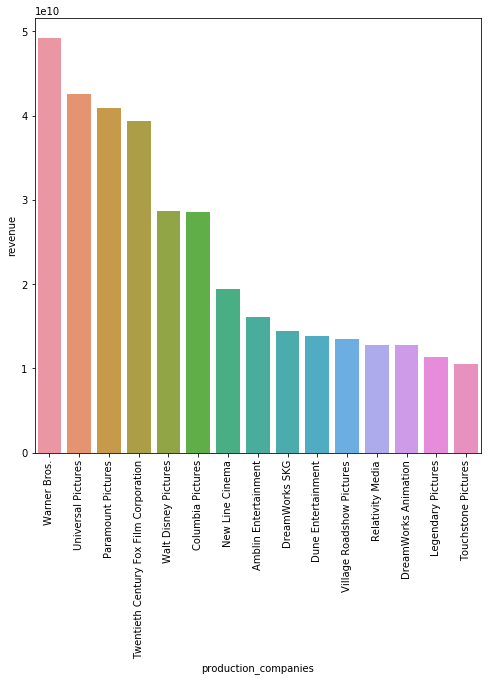

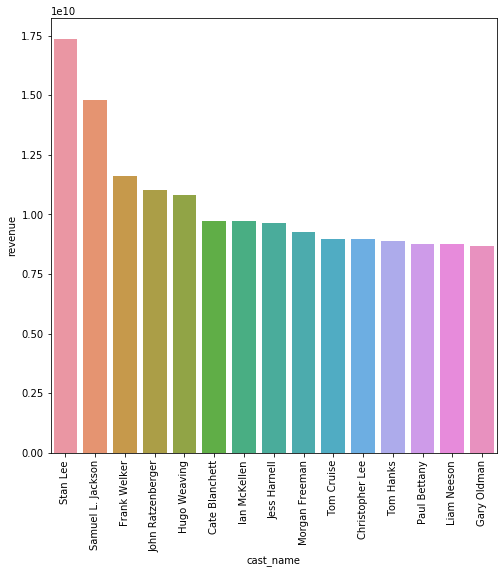

In [41]:
for i in ['genres', 'director', 'production_companies', 'cast_name']:
    sum_col_by_gb_col(movie_df, 'revenue', i)